In [1]:
import numpy as np
import pandas as pd
import emukit
import GPy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_film = pd.read_excel('...', sheet_name='11_30_film')
df_film.columns = ['ML Condition', 'Number', 'Speed [mm/s]',
       'Power [%]', 'Frequency [KHz]', 'Spacing [mm]', 'Type',
       'Success or Fail', 'Notes']
df_film_1130 = df_film

df_film = pd.read_excel('...', sheet_name='12_10_film')
df_film.columns = ['ML Condition', 'Number', 'Speed [mm/s]',
       'Power [%]', 'Frequency [KHz]', 'Spacing [mm]', 'Type',
       'Success or Fail', 'Notes']
df_film_1210 = df_film

df_film = pd.concat([df_film_1130, df_film_1210], ignore_index = True)
df_film.iloc[:,:-1]
success_conditions = df_film[df_film['Success or Fail']==1]['ML Condition'].values
df_film

ML Condition  Number  Speed [mm/s]  Power [%]  Frequency [KHz]  \
0              1       1           200         70               10   
1              2       1           900         40               20   
2              3       1          1000         30               30   
3              4       2           100         20               20   
4              5       2           600         30               20   
5              6       2           900         10               30   
6              7       3           300        100               20   
7              8       3          1000         40               20   
8              9       4           100         30               10   
9             10       4          1000         60               20   
10            11       4           200         20               10   
11            12       5          1000         50               10   
12            13       8           700         90               10   
13            14       5           800         30               40   
14            15       5           400         10               20   
15            16       7          1300         50               20   
16            17       7          1300         70               10   
17            18       8           500         50               20   
18            19       9           400        100               30   
19            20      10           200        100               50   
20            21       5           500         60               10   
21            22       6           700         70               10   
22            23       7           500         50               10   
23            24       7           500         60               10   
24            25       7           600         40               20   
25            26       7           600         50               10   
26            27       7           600         50               10   
27            28       7           600         50               20   
28            29       7           700         50               10   
29            30       9           500         50               20   

    Spacing [mm]  Type  Success or Fail  Notes  
0           0.01     3                1    NaN  
1           0.05     3                1    NaN  
2           0.01     3                1    NaN  
3           0.11     2                0    NaN  
4           0.07     2                1    NaN  
5           0.09     3                0    NaN  
6           0.03     1                1    NaN  
7           0.13     2                1    NaN  
8           0.15     2                1    NaN  
9           0.11     3                1    NaN  
10          0.01     2                0    NaN  
11          0.05     1                1    NaN  
12          0.11     2                1    NaN  
13          0.13     2                1    NaN  
14          0.01     1                0    NaN  
15          0.01     2                1    NaN  
16          0.09     1                1    NaN  
17          0.03     3                1    NaN  
18          0.05     1                1    NaN  
19          0.09     1                1    NaN  
20          0.09     2                1    NaN  
21          0.01     1                1    NaN  
22          0.09     2                1    NaN  
23          0.11     2                1    NaN  
24          0.11     1                1    NaN  
25          0.09     2                1    NaN  
26          0.11     2                1    NaN  
27          0.11     1                1    NaN  
28          0.09     2                1    NaN  
29          0.07     1                1    NaN

In [4]:
df_csc = pd.read_excel('...', sheet_name='11_30_csc')
df_csc.columns = ['ML Condition', 'Number', 'Speed [mm/s]',
       'Power [%]', 'Frequency [KHz]', 'Spacing [mm]', 'Type',
       'FDT [s]', 'RFDT']
df_csc_1130 = df_csc

df_csc = pd.read_excel('...', sheet_name='12_10_csc')
df_csc.columns = ['ML Condition', 'Number', 'Speed [mm/s]',
       'Power [%]', 'Frequency [KHz]', 'Spacing [mm]', 'Type',
       'FDT [s]', 'RFDT']
df_csc_1210 = df_csc

df_csc = pd.concat([df_csc_1130, df_csc_1210], ignore_index = True)

df_csc = df_csc.sort_values(by=list(df_csc.iloc[:,[0,-1]].columns)).drop_duplicates('ML Condition', keep = 'last', ignore_index = True)
df_csc = df_csc[df_csc['ML Condition'].isin(success_conditions)]
df_csc

ML Condition  Number  Speed [mm/s]  Power [%]  Frequency [KHz]  \
0              1       1           200         70               10   
1              2       1           900         40               20   
2              3       1          1000         30               30   
4              5       2           600         30               20   
6              7       3           300        100               20   
7              8       3          1000         40               20   
8              9       4           100         30               10   
9             10       4          1000         60               20   
11            12       5          1000         50               10   
12            13       8           700         90               10   
13            14       5           800         30               40   
15            16       7          1300         50               20   
16            17       7          1300         70               10   
17            18       8           500         50               20   
18            19       9           400        100               30   
19            20      10           200        100               50   
20            21       5           500         60               10   
21            22       6           700         70               10   
22            23       7           500         50               10   
23            24       7           500         60               10   
24            25       7           600         40               20   
25            26       7           600         50               10   
26            27       7           600         50               10   
27            28       7           600         50               20   
28            29       7           700         50               10   
29            30       9           500         50               20   

    Spacing [mm]  Type  FDT [s]   RFDT  
0           0.01     3    54.81   2.16  
1           0.05     3   305.71  12.05  
2           0.01     3   126.34   4.98  
4           0.07     2   271.46  10.70  
6           0.03     1   120.25   4.74  
7           0.13     2   114.67   4.52  
8           0.15     2   385.12  15.18  
9           0.11     3   343.26  13.53  
11          0.05     1   354.93  13.99  
12          0.11     2   399.32  15.74  
13          0.13     2   213.36   8.41  
15          0.01     2   147.91   5.83  
16          0.09     1   316.11  12.46  
17          0.03     3   373.71  14.73  
18          0.05     1   123.55   4.87  
19          0.09     1   125.33   4.94  
20          0.09     2   114.41   4.51  
21          0.01     1   509.13  20.06  
22          0.09     2   128.56   5.07  
23          0.11     2   316.02  12.46  
24          0.11     1   372.51  14.68  
25          0.09     2   129.50   5.10  
26          0.11     2   341.57  13.46  
27          0.11     1   506.13  19.95  
28          0.09     2   134.18   5.29  
29          0.07     1   511.11  20.14

In [5]:
df_preliminary  = pd.read_excel('...', sheet_name='Sheet1')
print(df_preliminary.columns)
df_preliminary.columns = ['', 'Number', 'Speed [mm/s]',
       'Power [%]', 'Frequency [KHz]', 'Spacing [mm]', 'Type',
       'FDT [s]', 'RFDT']
df_preliminary = df_preliminary.iloc[:,1:]
df_preliminary

Index(['ML Condition', 'Number', 'Speed [mm/s]', 'Power [%]',
       'Frequency [kHz]', 'Spacing [mm]', 'Type', 'FDT [s]', 'RFDT'],
      dtype='object')


Number  Speed [mm/s]  Power [%]  Frequency [KHz]  Spacing [mm]  Type  \
0        8           400         80               40          0.05     1   
1        3           100         60               10          0.09     1   
2        5           700         40               50          0.11     1   
3        1          1500         40               30          0.05     1   
4        7           700         90               30          0.05     1   
5        2          1500         50               50          0.07     1   
6        1          1000         30               20          0.15     1   
7        9           800         70               10          0.07     1   
8        7           300         90               10          0.01     1   
9        4           900         60               50          0.13     1   
10       2           500         90               50          0.15     1   
11      10           500         30               20          0.07     1   
12      10           200         50               30          0.13     1   
13       1          1300         50               20          0.03     1   
14       7           400         50               10          0.13     1   
15       5           300         70               20          0.01     1   
16       8           100         30               10          0.01     2   
17       5           400         80               50          0.09     2   
18      10           800         20               30          0.03     2   
19       3           800         90               40          0.05     2   
20      10          1000         80               50          0.09     2   
21       6          1500         70               10          0.05     2   
22       2           300         70               40          0.13     2   
23       7          1500         70               30          0.05     2   
24       4           200         90               20          0.13     2   
25       3          1000         90               50          0.01     2   
26       5          1200         40               40          0.11     2   
27       5           900         30               30          0.09     2   
28       3           200         40               50          0.11     2   
29       2           700         50               30          0.15     2   
30       3           300         80               10          0.01     2   
31       1           400         70               10          0.11     2   
32       6           900         50               20          0.09     2   
33       4           800         50               40          0.03     3   
34       9           200         50               10          0.15     3   
35       5           200         80               50          0.07     3   
36       1          1500         50               20          0.13     3   
37       2           300         30               10          0.09     3   
38       1           900         60               30          0.01     3   
39       9          1000         30               20          0.11     3   
40       5           800         40               40          0.07     3   
41       3           100         80               10          0.05     3   
42       3           500         90               10          0.15     3   
43       6           700         30               40          0.09     3   
44       1          1400         40               10          0.01     3   
45       9           600         30               30          0.09     3   
46       7          1000         30               40          0.15     3   
47       6          1200        100               30          0.13     3   
48      10           900         40               20          0.01     3   
49       7          1500         30               40          0.09     3   
50       2           400         50               20          0.11     3   
51       4           700        100               40

In [6]:
numb_min, numb_max, numb_step = [1, 10, 1]
numb_var = np.arange(numb_min, numb_max+numb_step, numb_step)
numb_num = len(numb_var)

speed_min, speed_max, speed_step = [100, 1500, 100]
speed_var = np.arange(speed_min, speed_max+speed_step, speed_step)
speed_num = len(speed_var)

power_min, power_max, power_step = [10, 100, 10]
power_var = np.arange(power_min, power_max+power_step, power_step) 
power_num = len(power_var)

freq_min, freq_max, freq_step = [10, 50, 10]
freq_var = np.arange(freq_min, freq_max+freq_step, freq_step)
freq_num = len(freq_var)

spac_min, spac_max, spac_step = [0.01, 0.15, 0.02]
spac_var = np.arange(spac_min, spac_max+spac_step, spac_step)
spac_num = len(spac_var)

type_min, type_max, type_step = [1, 3, 1]
type_var = np.arange(type_min, type_max+type_step, type_step)
type_num = len(type_var)


var_array = [numb_var, speed_var, 
             power_var, freq_var, 
             spac_var, type_var]
x_labels = ['Number', 
            'Speed [mm/s]',
            'Power [%]', 
            'Frequency [KHz]', 
            'Spacing [mm]', 
            'Type']
def x_normalizer(X):
    
    def max_min_scaler(x, x_max, x_min):
        return (x-x_min)/(x_max-x_min)
    
    x_norm = []
    for x in (X):
           x_norm.append([max_min_scaler(x[i], 
                                         max(var_array[i]), 
                                         min(var_array[i])) for i in range(len(x))])  
    return np.array(x_norm)

def x_denormalizer(x_norm):
    def max_min_rescaler(x, x_max, x_min):
        return x*(x_max-x_min)+x_min
    
    x_original = []
    for x in (x_norm):
           x_original.append([max_min_rescaler(x[i], 
                                         max(var_array[i]), 
                                         min(var_array[i])) for i in range(len(x))])
    return np.array(x_original)



def get_closest_array(suggested_x):
    
    def get_closest_value(given_value, array_list):
        absolute_difference_function = lambda list_value : abs(list_value - given_value)
        closest_value = min(array_list, key=absolute_difference_function)
        return closest_value
    
    var_list = var_array
    modified_array = []
    for x in suggested_x:
        modified_array.append([get_closest_value(x[i], var_list[i]) for i in range(len(x))])
    return np.array(modified_array)

In [7]:
from emukit.core import ParameterSpace, ContinuousParameter, DiscreteParameter
from emukit.core.initial_designs.random_design import RandomDesign
from emukit.core.initial_designs.latin_design import LatinDesign

parameter_space = ParameterSpace([ContinuousParameter('numb', 0-1/(numb_num-1)/2, 1+1/(numb_num-1)/2),
                                 ContinuousParameter('speed', 0-1/(speed_num-1)/2, 1+1/(speed_num-1)/2),
                                 ContinuousParameter('power', 0-1/(power_num-1)/2, 1+1/(power_num-1)/2),
                                 ContinuousParameter('freq', 0-1/(freq_num-1)/2, 1+1/(freq_num-1)/2),
                                 ContinuousParameter('spac', 0-1/(spac_num-1)/2, 1+1/(spac_num-1)/2),
                                 ContinuousParameter('type', 0-1/(type_num-1)/2, 1+1/(type_num-1)/2)
                                 ])


In [8]:
from typing import Union
from emukit.core.acquisition import Acquisition
from emukit.core.interfaces import IModel, IDifferentiable
from emukit.core.loop import FixedIntervalUpdater, OuterLoop, SequentialPointCalculator
from emukit.core.loop.loop_state import create_loop_state
from emukit.core.optimization import AcquisitionOptimizerBase
from emukit.core.optimization import GradientAcquisitionOptimizer
from emukit.bayesian_optimization.acquisitions.log_acquisition import LogAcquisition
from emukit.bayesian_optimization.local_penalization_calculator import LocalPenalizationPointCalculator
from emukit.bayesian_optimization.acquisitions import ExpectedImprovement, \
                                                      NegativeLowerConfidenceBound, \
                                                      MaxValueEntropySearch, \
                                                      MultipointExpectedImprovement,\
                                                      ProbabilityOfFeasibility
from emukit.core.acquisition import IntegratedHyperParameterAcquisition

class ProbabilisticConstraintBayesianOptimizationLoop2(OuterLoop):
    def __init__(self, space: ParameterSpace, model_objective: Union[IModel, IDifferentiable],
                 model_constraint1: Union[IModel, IDifferentiable], 
                 model_constraint2: Union[IModel, IDifferentiable],
                 acquisition: Acquisition = None,
                 update_interval: int = 1, batch_size: int = 1):

        self.model_objective = model_objective
        self.model_constraint1 = model_constraint1
        self.model_constraint2 = model_constraint2
        
        if acquisition is None:
            acquisition = ExpectedImprovement(model_objective)
        
        acquisition_constraint1 = ScaledProbabilityOfFeasibility(model_constraint1, max_value = 1, min_value = 0.2)
        acquisition_constraint2 = ScaledProbabilityOfFeasibility(model_constraint2, max_value = 1, min_value = 0.8)
        acquisition_constraint = acquisition_constraint1*acquisition_constraint2
        acquisition_constrained = acquisition * acquisition_constraint

        model_updater_objective = FixedIntervalUpdater(model_objective, update_interval)
        model_updater_constraint1 = FixedIntervalUpdater(model_constraint1, update_interval,
                                                        lambda state: state.Y_constraint1)
        model_updater_constraint2 = FixedIntervalUpdater(model_constraint2, update_interval,
                                                        lambda state: state.Y_constraint2)

        acquisition_optimizer = GradientAcquisitionOptimizer(space)
        if batch_size == 1:
            candidate_point_calculator = SequentialPointCalculator(acquisition_constrained, acquisition_optimizer)
        else:
            log_acquisition = LogAcquisition(acquisition_constrained)
            candidate_point_calculator = LocalPenalizationPointCalculator(log_acquisition, acquisition_optimizer,
                                                                          model_objective, space, batch_size)
        loop_state = create_loop_state(model_objective.X, model_objective.Y)
        

        super(ProbabilisticConstraintBayesianOptimizationLoop2, self).__init__(candidate_point_calculator,
                                                                              [model_updater_objective, model_updater_constraint1,model_updater_constraint2],
                                                                              loop_state)

In [9]:
from typing import Tuple, Union
import scipy.stats
import numpy as np
from emukit.core.acquisition import Acquisition
from emukit.core.interfaces import IModel, IDifferentiable

class ScaledProbabilityOfFeasibility(Acquisition):

    def __init__(self, model: Union[IModel, IDifferentiable], jitter: float = float(0),
                 max_value: float = float(1), min_value: float = float(0)) -> None:

        self.model = model
        self.jitter = jitter
        self.max_value = max_value
        self.min_value = min_value

    def evaluate(self, x: np.ndarray) -> np.ndarray:

        mean, variance = self.model.predict(x)
        mean += self.jitter

        standard_deviation = np.sqrt(variance)
        cdf = scipy.stats.norm.cdf(0, mean, standard_deviation)
        return cdf*(self.max_value-self.min_value)+self.min_value

    def evaluate_with_gradients(self, x: np.ndarray) -> Tuple:
       
        mean, variance = self.model.predict(x)
        standard_deviation = np.sqrt(variance)

        dmean_dx, dvariance_dx = self.model.get_prediction_gradients(x)
        dstandard_devidation_dx = dvariance_dx / (2 * standard_deviation)

        mean += self.jitter
        u = - mean / standard_deviation
        pdf = scipy.stats.norm.pdf(0, mean, standard_deviation)
        cdf = scipy.stats.norm.cdf(0, mean, standard_deviation)
        dcdf_dx = - pdf * (dmean_dx + dstandard_devidation_dx * u)

        return cdf*(self.max_value-self.min_value)+self.min_value, dcdf_dx

    def has_gradients(self):
        return isinstance(self.model, IDifferentiable)

In [10]:
np.random.seed(10)

from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper

x_init = x_normalizer(df_csc.iloc[:,1:7].values)
y_init = np.transpose([df_csc.iloc[:,-1].values])
xc_init = x_normalizer(df_film.iloc[:,1:7].values)
yc_init = np.transpose([df_film.iloc[:,-2].values])
X, Y, Xc, Yc = [x_init, y_init, xc_init, yc_init]

Xc2 = x_normalizer(df_preliminary.iloc[:,0:6].values)
Yc2 = np.transpose([df_preliminary.iloc[:,-1].values])

input_dim = len(X[0])
ker = GPy.kern.Matern52(input_dim = input_dim, ARD =True)#
ker.lengthscale.constrain_bounded(1e-1, 1)
ker.variance.constrain_bounded(1e-1, 1000.0)

model_gpy = GPRegression(X , -Y, ker)
model_gpy.Gaussian_noise.variance = 1**2
model_gpy.Gaussian_noise.variance.fix()
model_gpy.randomize()
model_gpy.optimize_restarts(num_restarts=20,verbose =False, messages=False)
objective_model = GPyModelWrapper(model_gpy)

input_dim = len(Xc[0])
ker = GPy.kern.RBF(input_dim = input_dim, ARD = True)
ker.lengthscale.constrain_bounded(1e-1, 1)
ker.variance.constrain_bounded(1e-1, 1000.0) 
yc_offset = 0.5
gpy_constraint_model = GPRegression(Xc, -(Yc-yc_offset), ker)
gpy_constraint_model.randomize()
gpy_constraint_model.optimize_restarts(num_restarts=20,verbose =False, messages=False) 
constraint_model1 = GPyModelWrapper(gpy_constraint_model)

input_dim = len(Xc2[0])
ker = GPy.kern.RBF(input_dim = input_dim, ARD =True)
ker.lengthscale.constrain_bounded(0.5, 1)
ker.variance.constrain_bounded(1e-1, 1000.0)
ker += GPy.kern.White(input_dim = input_dim)
yc2_offset = np.mean(Yc2)
gpy_constraint_model2 = GPRegression(Xc2 , -(Yc2-yc2_offset), ker)
gpy_constraint_model2.randomize()
gpy_constraint_model2.optimize_restarts(num_restarts=20,verbose =False, messages=False)
constraint_model2 = GPyModelWrapper(gpy_constraint_model2)


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.variance
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.variance


In [11]:
objective_model.model.kern.lengthscale

GP_regression.Mat52.lengthscale:
Param([1.        , 0.9999998 , 0.54119041, 0.19629246, 0.35730386,
       1.        ])

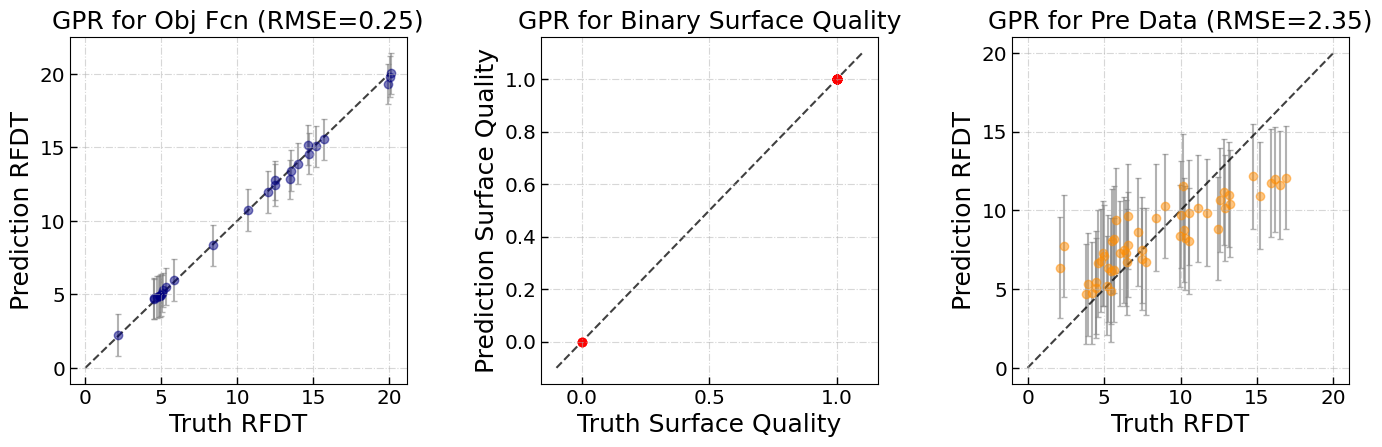

In [12]:
f_obj =  objective_model.model.predict
f_cons1 = constraint_model1.model.predict
f_cons2 = constraint_model2.model.predict

y_pred, y_uncer = f_obj(X)
y_pred = -y_pred[:,-1]
y_uncer = np.sqrt(y_uncer[:,-1])

yc_pred, yc_uncer = f_cons1(Xc)
yc_pred = -yc_pred[:,-1]+yc_offset
yc_uncer = np.sqrt(yc_uncer[:,-1])

yc2_pred, yc2_uncer = f_cons2(Xc2)
yc2_pred = -yc2_pred[:,-1]+yc2_offset
yc2_uncer = np.sqrt(yc2_uncer[:,-1])


from sklearn.metrics import mean_squared_error
fig, axes = plt.subplots(1, 3, figsize=(5.5*3, 4.5))
fs = 18
lims1 = (0, 20)
axes[0].scatter(Y[:,-1], y_pred, alpha = 0.5, c = 'navy' , edgecolor = 'navy')
axes[0].errorbar(Y[:,-1], y_pred, yerr = y_uncer, ms = 0, 
             ls = '', capsize = 2, alpha = 0.6,
             color = 'gray', zorder = 0)
axes[0].plot(lims1, lims1, 'k--', alpha=0.75, zorder=0)
rmse_value = np.sqrt(mean_squared_error(Y[:,-1], y_pred))
title = 'GPR for Obj Fcn' + " (RMSE=%.2f" % rmse_value+')'
axes[0].set_xlabel('Truth RFDT', fontsize = fs)
axes[0].set_ylabel('Prediction RFDT', fontsize = fs)
axes[0].set_title(title, fontsize = fs)

lims2 = (-.1, 1.1)
axes[1].scatter(Yc[:,-1], yc_pred, alpha = 0.6, edgecolor = 'r', c = 'r')
axes[1].errorbar(Yc[:,-1], yc_pred, yerr = yc_uncer, ms = 0, 
             ls = '', capsize = 2, alpha = 0.6,
             color = 'gray', zorder = 0)

axes[1].plot(lims2, lims2, 'k--', alpha=0.75, zorder=0)
title = 'GPR for Binary Surface Quality'
axes[1].set_xlabel('Truth Surface Quality', fontsize = fs)
axes[1].set_ylabel('Prediction Surface Quality', fontsize = fs)
axes[1].set_title(title, fontsize = fs)


lims3 = (0, 30)
axes[2].scatter(Yc2[:,-1], yc2_pred, alpha = 0.5, c = 'darkorange', edgecolor = 'darkorange')
axes[2].errorbar(Yc2[:,-1], yc2_pred, yerr = yc2_uncer, ms = 0, 
             ls = '', capsize = 2, alpha = 0.6,
             color = 'gray', zorder = 0)
axes[2].plot(lims1, lims1, 'k--', alpha=0.75, zorder=0)
rmse_value = np.sqrt(mean_squared_error(Yc2[:,-1], yc2_pred))
title = 'GPR for Pre Data' + " (RMSE=%.2f" % rmse_value+')'

axes[2].set_xlabel('Truth RFDT', fontsize = fs)
axes[2].set_ylabel('Prediction RFDT', fontsize = fs)
axes[2].set_title(title, fontsize = fs)

        
for i in range(len(axes)):
    axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    axes[i].grid(True, linestyle='-.')
plt.subplots_adjust(wspace = 0.4)

plt.show()

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import spearmanr

mse = mean_squared_error
mse_all = mse(Y[:,-1], y_pred)
print ('all rmse: %.4f' % (np.sqrt(mse_all)))

rsquared_all = r2_score(Y[:,-1], y_pred)
print ('all R^2: %.4f' % (rsquared_all))

sprman_all = spearmanr(Y[:,-1], y_pred)
print ('all spearman: %.4f' % (sprman_all[0]))

all rmse: 0.2480
all R^2: 0.9979
all spearman: 0.9978


In [14]:
acquisition = NegativeLowerConfidenceBound(objective_model, beta = 1)                        

bayesopt_cons_pr = ProbabilisticConstraintBayesianOptimizationLoop2(model_objective=objective_model, 
                                                          space=parameter_space, 
                                                          acquisition=acquisition,
                                                          model_constraint1=constraint_model1,
                                                          model_constraint2=constraint_model2,
                                                          batch_size = 22)

X_new = bayesopt_cons_pr.candidate_point_calculator.compute_next_points(bayesopt_cons_pr.loop_state)
X_new = x_normalizer(get_closest_array(x_denormalizer(X_new)))

f_obj =  objective_model.model.predict       
f_cons1 = constraint_model1.model.predict
f_cons2 = constraint_model2.model.predict

f_cons_acq = bayesopt_cons_pr.candidate_point_calculator.acquisition.acquisition.evaluate
f_raw_acq = bayesopt_cons_pr.candidate_point_calculator.acquisition.acquisition.acquisition_1.evaluate
f_cons_pr = bayesopt_cons_pr.candidate_point_calculator.acquisition.acquisition.acquisition_2.evaluate

print('total condition no.:', len(Xc))
print('total csc no.:', len(bayesopt_cons_pr.loop_state.Y))
print('maximum Y (RFDT): ', -np.min(np.transpose(np.round(bayesopt_cons_pr.loop_state.Y, 2))))

df_Xnew = pd.DataFrame(get_closest_array(x_denormalizer(X_new)), columns = df_film.columns[1:7])
df_all = pd.concat([df_film.iloc[:,1:7], df_Xnew])
df_all_ = df_all.drop_duplicates()
df_Xnew = df_all_.iloc[len(df_film):len(df_film)+10]
df_Xnew = df_Xnew.sort_values(by=list(df_film.columns[1:7]), ignore_index = True)
df_Xnew.index = np.arange(len(df_Xnew))+len(df_film)
df_Xnew

total condition no.: 30
total csc no.: 26
maximum Y (RFDT):  20.14


Number  Speed [mm/s]  Power [%]  Frequency [KHz]  Spacing [mm]  Type
30     6.0         800.0       90.0             20.0          0.11   1.0
31     6.0         900.0       70.0             20.0          0.11   1.0
32     6.0         900.0       90.0             20.0          0.11   1.0
33     7.0         800.0       90.0             20.0          0.11   1.0
34     7.0         900.0       70.0             20.0          0.11   1.0
35     7.0         900.0       90.0             20.0          0.11   1.0
36     8.0         900.0       70.0             20.0          0.11   1.0
37     8.0        1000.0       70.0             20.0          0.11   1.0

In [15]:
X_new = x_normalizer(df_Xnew.values)

y_pred_new, y_uncer_new = f_obj(X_new)
y_pred_new = -y_pred_new
y_uncer_new = np.sqrt(y_uncer_new)

acq_produc = f_cons_acq(X_new)
acq_fcn = f_raw_acq(X_new)
acq_cons = f_cons_pr(X_new)

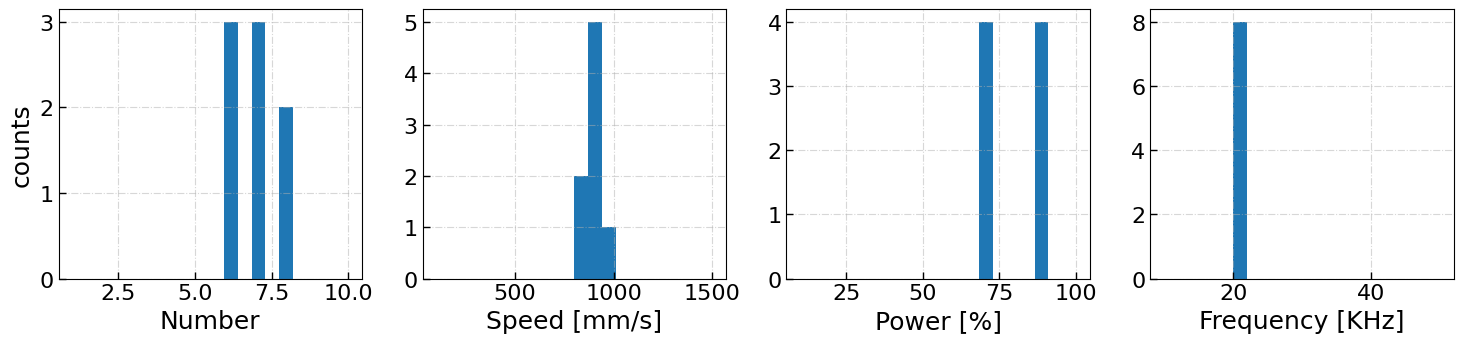

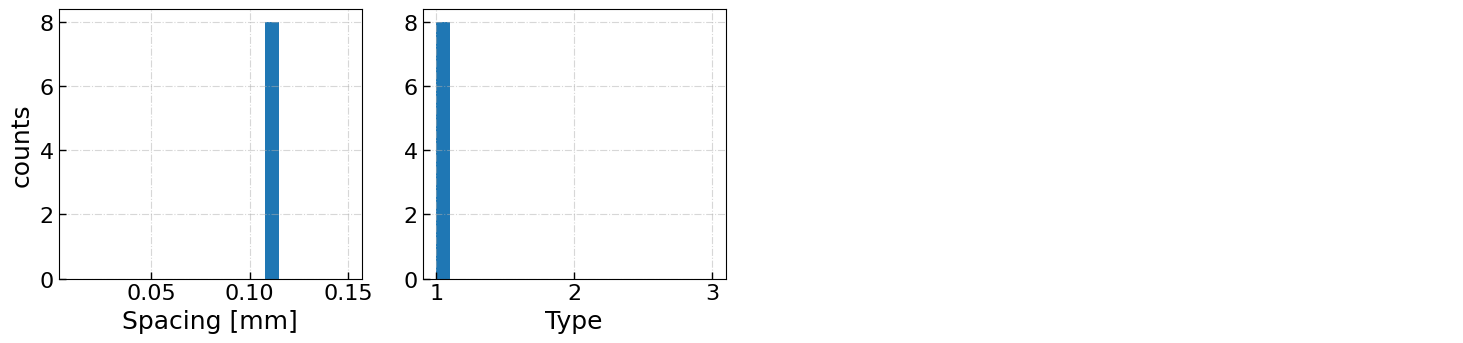

In [16]:
df = df_Xnew
df_cols = df.columns
n_col = 4

for n in np.arange(0, 8, n_col):
    fig,axes = plt.subplots(1, n_col, figsize=(18, 3.5), sharey = False)
    fs = 20
    for i in np.arange(n_col):
        if n< len(df_cols):
            axes[i].hist(df.iloc[:,n], bins= 20, range = (min(var_array[n]),max(var_array[n])))####
            axes[i].set_xlabel(df_cols[n], fontsize = 18)

        else:
            axes[i].axis("off")
        n = n+1      
    axes[0].set_ylabel('counts', fontsize = 18)
    for i in range(len(axes)):
        axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
        axes[i].grid(True, linestyle='-.')
    plt.show()

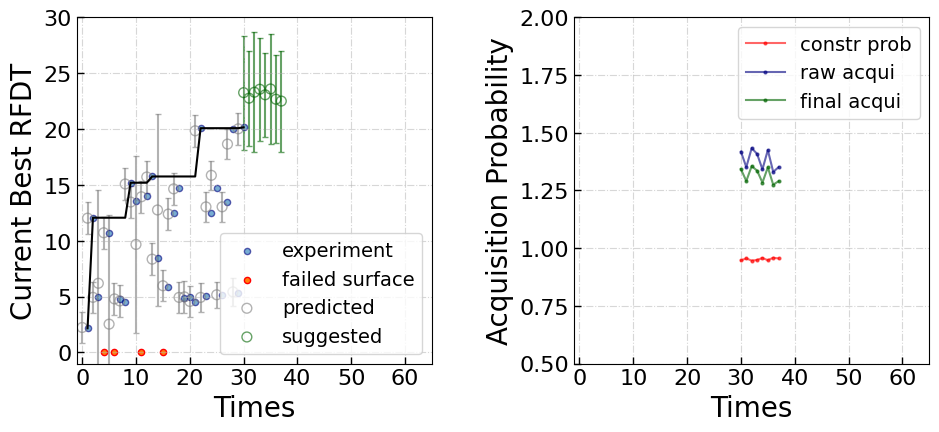

In [17]:
f_obj =  objective_model.model.predict       

csc_eff = df_csc.sort_values('ML Condition').iloc[:,[0,-1]].values
film_quality = df_film.sort_values('ML Condition').iloc[:,[0,-2]].values

fig, axes = plt.subplots(1, 2, figsize=(11, 4.5), sharey = False)
fs = 20
exp_cond = np.transpose(csc_eff)[0]
exp_eff = np.transpose(csc_eff)[1]

axes[0].scatter(exp_cond, exp_eff,
            edgecolor = 'navy', s = 20, alpha = 0.6, label = 'experiment')

unsuccess_film = np.transpose(film_quality[film_quality[:,-1] ==0])
axes[0].scatter(unsuccess_film[0], unsuccess_film[1],
                edgecolor = 'red',
                s = 20, label = 'failed surface')
all_cond = np.concatenate([csc_eff, np.transpose(unsuccess_film)])
all_cond = all_cond[np.argsort(all_cond[:,0])]
axes[0].plot(np.transpose(all_cond)[0], np.maximum.accumulate(np.transpose(all_cond)[1]), 
         marker = 'o', ms = 0, c = 'black')

X_sorted = x_normalizer(df_film.sort_values('ML Condition').iloc[:,1:7].values)
y_pred, y_uncer = f_obj(X_sorted)
y_pred = -y_pred[:,-1]
y_uncer = np.sqrt(y_uncer[:,-1])

axes[0].scatter(np.arange(len(X_sorted)), y_pred,
                s = 50, facecolors='none', alpha = 0.6, edgecolor = 'gray', label = 'predicted')
axes[0].errorbar(np.arange(len(X_sorted)), y_pred, yerr = y_uncer,  
                 ms = 0, ls = '', capsize = 2, alpha = 0.6, 
                 color = 'gray', zorder = 0)


y_pred_new, y_uncer_new = f_obj(X_new)
y_pred_new = -y_pred_new[:,-1]
y_uncer_new = np.sqrt(y_uncer_new[:,-1])

axes[0].scatter(np.arange(len(X_new))+len(Xc), y_pred_new,
                s = 50, facecolors='none', alpha = 0.6, edgecolor = 'darkgreen', label = 'suggested')
axes[0].errorbar(np.arange(len(X_new))+len(Xc), y_pred_new, yerr = y_uncer_new,  
                 ms = 0, ls = '', capsize = 2, alpha = 0.6, 
                 color = 'darkgreen', zorder = 0)


axes[0].set_ylabel('Current Best RFDT', fontsize = 20)
axes[0].set_xlabel('Times', fontsize = 20)

axes[0].set_ylim(-1, 30)
axes[0].set_xlim(-1, 65)
axes[0].set_xticks(np.arange(0,61,10))
axes[0].legend(fontsize = fs*0.7)

axes[1].plot(np.arange(len(X_new))+len(Xc), acq_cons, marker = 'o',
                ms = 2, alpha = 0.6, color = 'red', label = 'constr prob')
axes[1].plot(np.arange(len(X_new))+len(Xc), acq_fcn/20, marker = 'o',
                ms = 2, alpha = 0.6, color = 'navy', label = 'raw acqui')

axes[1].plot(np.arange(len(X_new))+len(Xc), acq_produc/20, marker = 'o',
                ms = 2, alpha = 0.6, color = 'darkgreen', label = 'final acqui')


axes[1].set_ylim(0.5, 2)
axes[1].set_xlim(-1, 65)
axes[1].set_xticks(np.arange(0,65,10))
axes[1].set_ylabel('Acquisition Probability', fontsize = fs)
axes[1].set_xlabel('Times', fontsize = fs)

for ax in axes:
    ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    ax.grid(True, linestyle='-.')
plt.subplots_adjust(wspace = 0.4)
plt.legend(fontsize = fs*0.7)
plt.show()

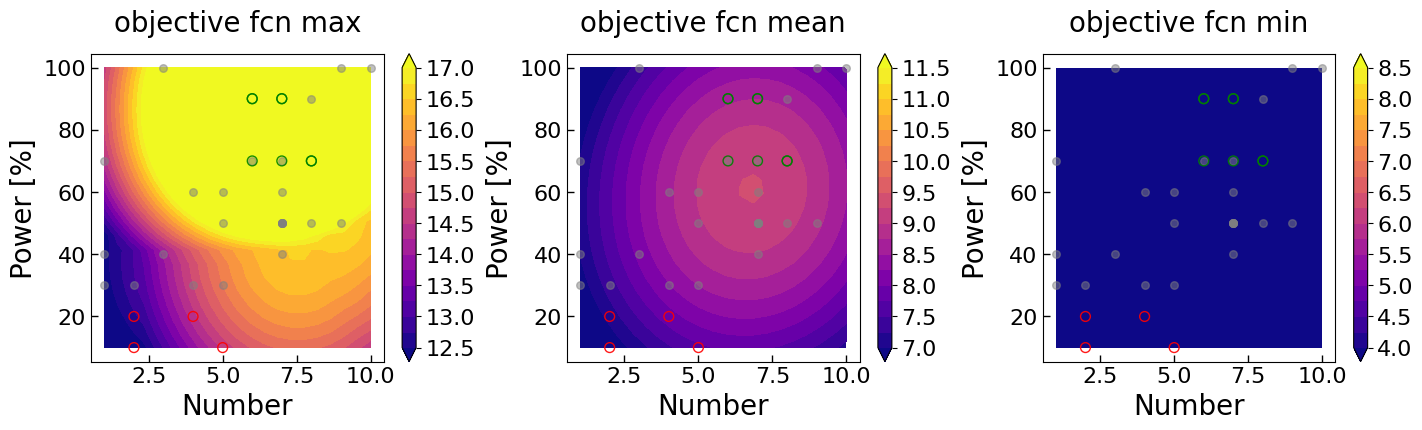

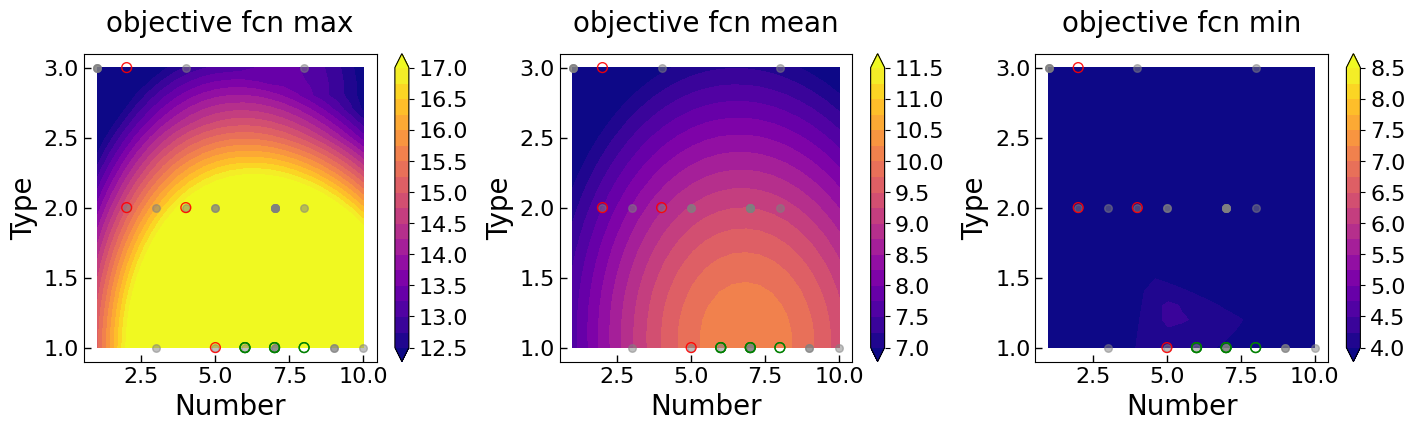

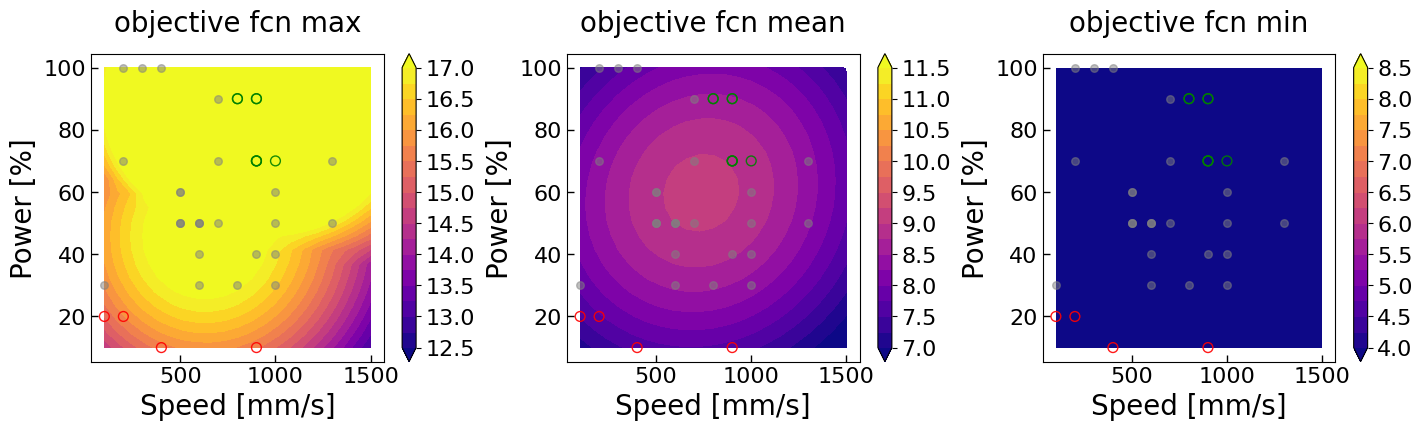

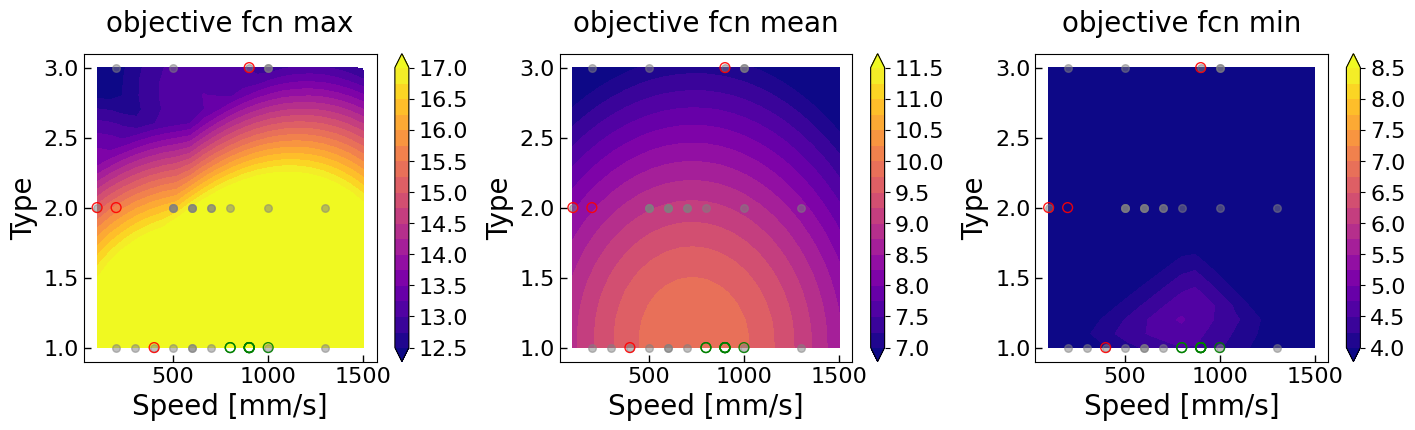

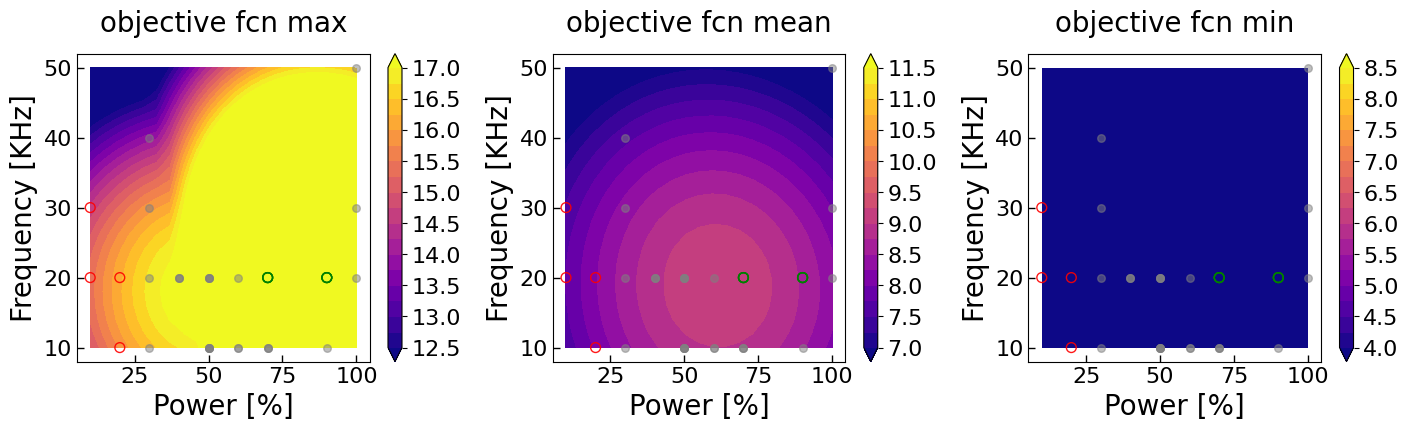

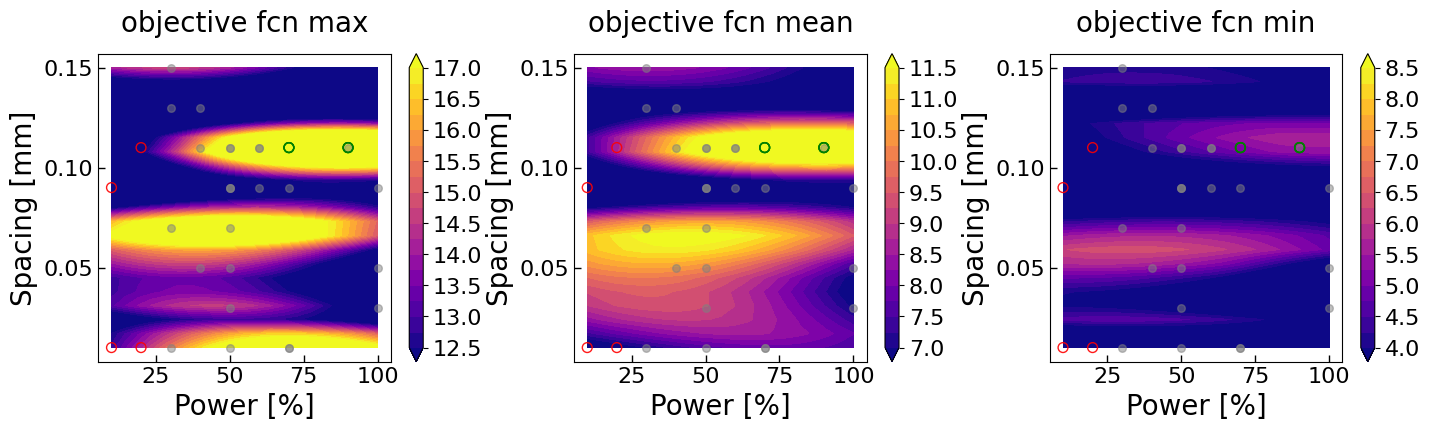

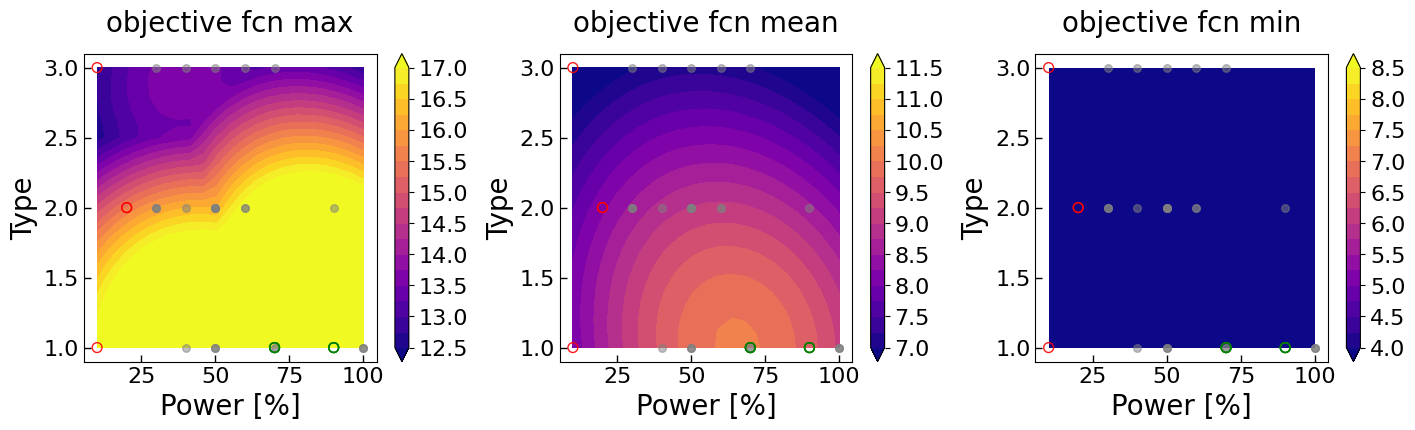

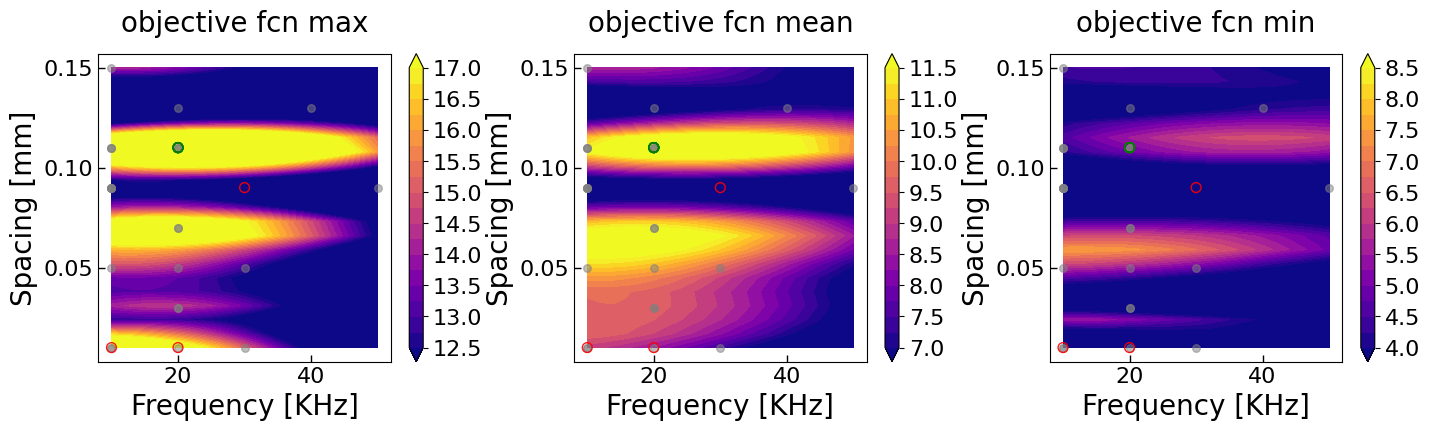

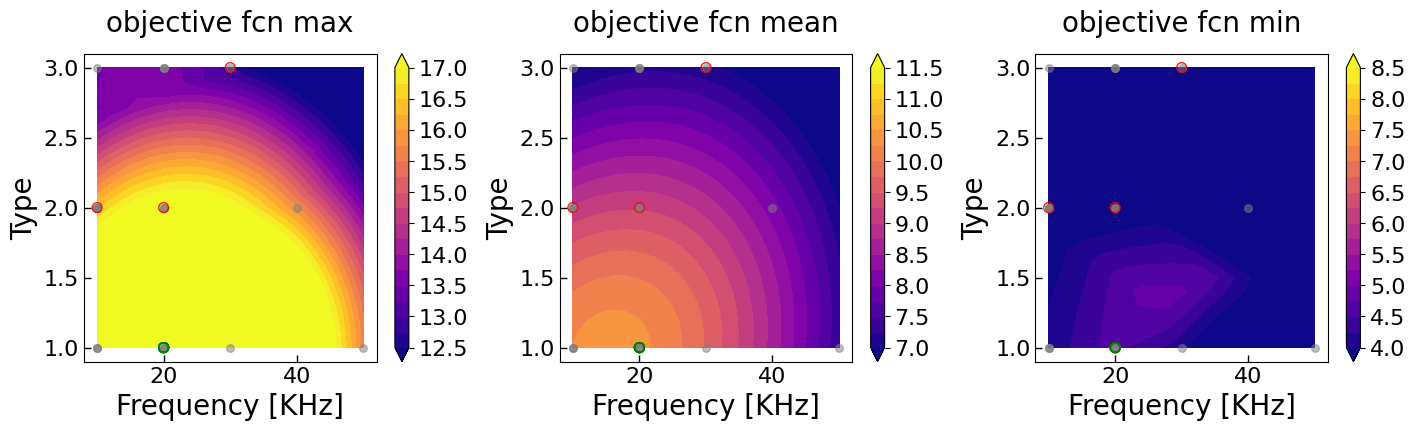

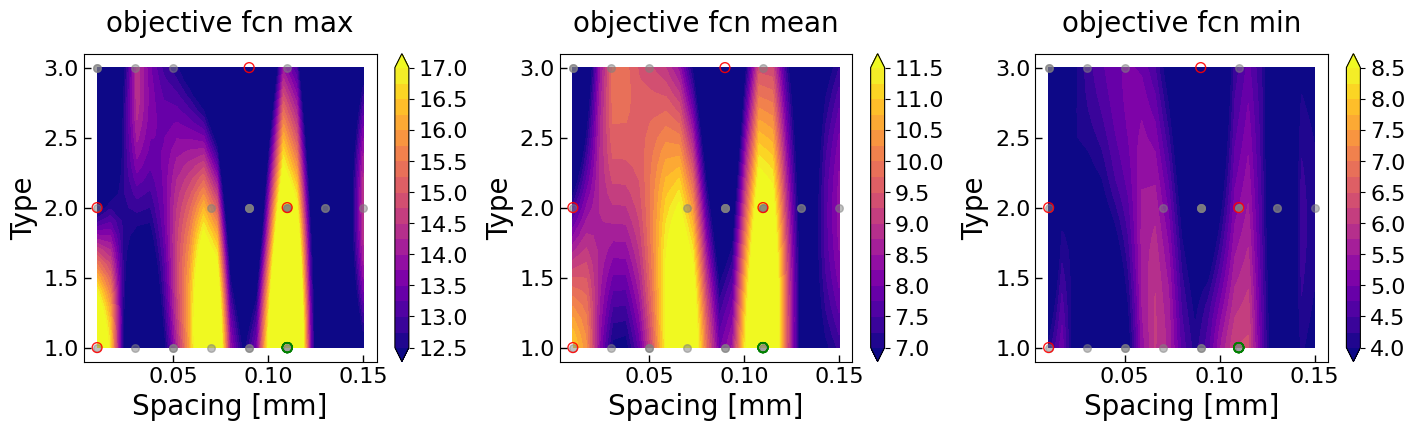

In [19]:
design = RandomDesign(parameter_space)
x_sampled = design.get_samples(200)
x_columns = df_csc.iloc[:,1:7].columns
for i in range(input_dim):
    for j in range(input_dim-i-1):
        

        ind1 = i
        ind2 = j+i+1
        n_steps =21
        x1x2y_pred, x1x2y_uncer =[[],[]]
        for x1 in np.linspace(0, 1, n_steps):
            for x2 in np.linspace(0, 1, n_steps):
                x_temp = np.copy(x_sampled)
                x_temp[:,ind1] = x1
                x_temp[:,ind2] = x2
                y_pred, y_uncer = f_obj(x_temp)
                y_pred = -y_pred
                x1_org = x_denormalizer(x_temp)[0,ind1]
                x2_org = x_denormalizer(x_temp)[0,ind2]
                x1x2y_pred.append([x1_org, x2_org, np.max(y_pred), np.mean(y_pred), np.min(y_pred)])
                x1x2y_uncer.append([x1_org, x2_org, np.max(np.sqrt(y_uncer)), np.mean(np.sqrt(y_uncer)), np.min(np.sqrt(y_uncer))])
        
        x1 = np.array(x1x2y_pred, dtype=object)[:,0].reshape(n_steps, n_steps)
        x2 = np.array(x1x2y_pred, dtype=object)[:,1].reshape(n_steps, n_steps)
            
        y_pred_max = np.array(x1x2y_pred, dtype=object)[:,2].reshape(n_steps, n_steps)
        y_pred_mean = np.array(x1x2y_pred, dtype=object)[:,3].reshape(n_steps, n_steps)
        y_pred_min = np.array(x1x2y_pred, dtype=object)[:,4].reshape(n_steps, n_steps)
        
        y_uncer_max = np.array(x1x2y_uncer, dtype=object)[:,2].reshape(n_steps, n_steps)
        y_uncer_mean = np.array(x1x2y_uncer, dtype=object)[:,3].reshape(n_steps, n_steps)
        y_uncer_min = np.array(x1x2y_uncer, dtype=object)[:,4].reshape(n_steps, n_steps)

        fs = 20
        title_pad = 16
        

        fig,axes = plt.subplots(1, 3, figsize=(17, 4), sharey = False, sharex = False)
        colorbar_offset = [12.5, 7, 4]
        for ax, c_offset, y in zip(axes, colorbar_offset,
                                   [y_pred_max, y_pred_mean, y_pred_min]):
            
            c_plt1 = ax.contourf(x1, x2, y, levels = np.arange(19)*0.25+c_offset, cmap='plasma', extend = 'both')
            cbar = fig.colorbar(c_plt1, ax= ax)
            cbar.ax.tick_params(labelsize=fs*0.8)
            ax.scatter(x_denormalizer(X)[:, ind1], 
                       x_denormalizer(X)[:, ind2], 
                       s = 30, facecolors='gray', alpha = 0.5, edgecolor = 'gray')
            ax.scatter(x_denormalizer(Xc[Yc[:,-1]==0])[:, ind1],
                       x_denormalizer(Xc[Yc[:,-1]==0])[:, ind2], 
                       s = 50, facecolors='none', alpha = 0.9, edgecolor = 'red')

            ax.scatter(x_denormalizer(X_new)[:, ind1], 
                       x_denormalizer(X_new)[:, ind2], 
                       s = 50, facecolors='none', alpha = 0.9, edgecolor = 'green')
            ax.set_xlabel(str(x_columns[ind1]),fontsize =  fs)
            ax.set_ylabel(str(x_columns[ind2]),fontsize =  fs)

            x1_delta = (np.max(x1)-np.min(x1))*0.05
            x2_delta = (np.max(x2)-np.min(x2))*0.05
            ax.set_xlim(np.min(x1)-x1_delta, np.max(x1)+x1_delta)
            ax.set_ylim(np.min(x2)-x2_delta, np.max(x2)+x2_delta)
            ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8)


        axes[0].set_title('objective fcn max', pad = title_pad,fontsize =  fs)
        axes[1].set_title('objective fcn mean', pad = title_pad,fontsize =  fs)
        axes[2].set_title('objective fcn min', pad = title_pad,fontsize =  fs)

        plt.subplots_adjust(wspace = 0.3)
        plt.show()

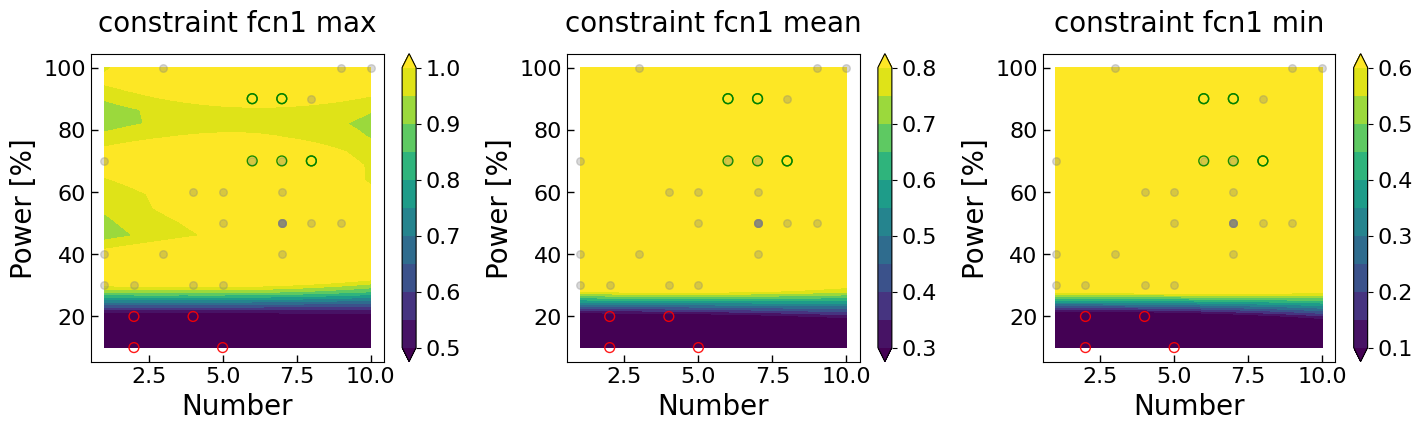

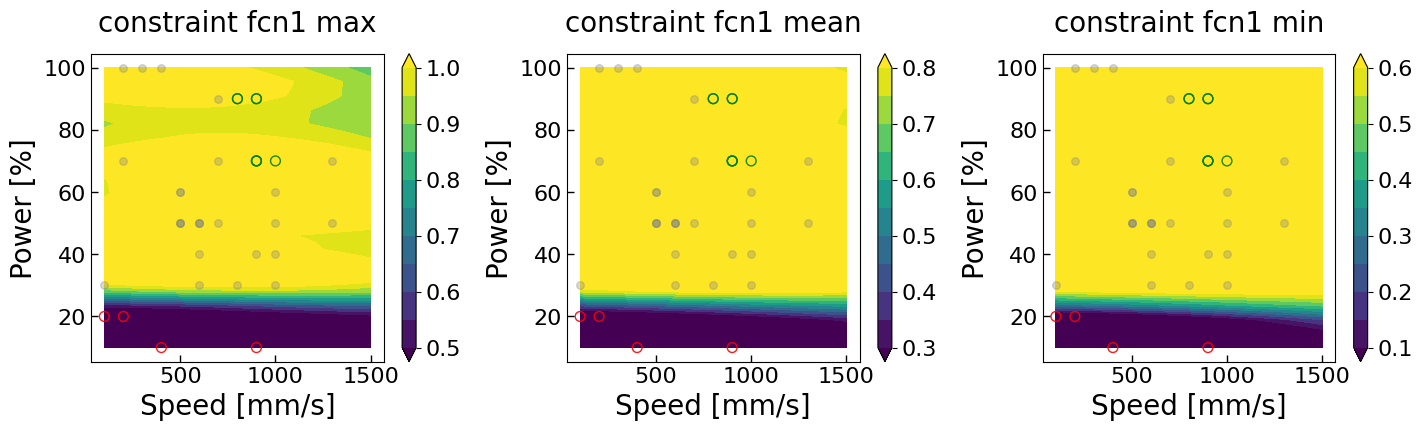

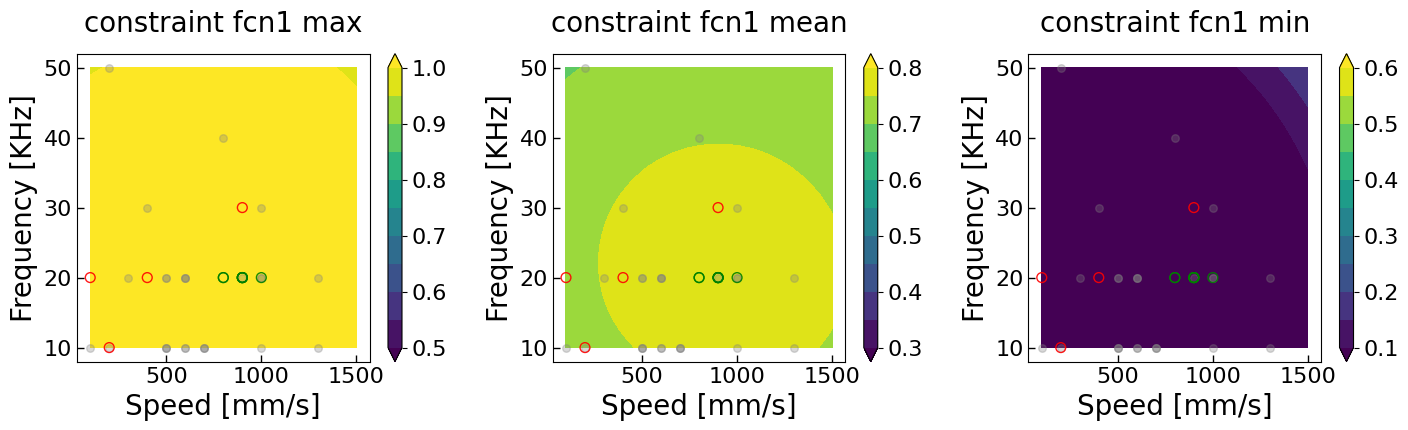

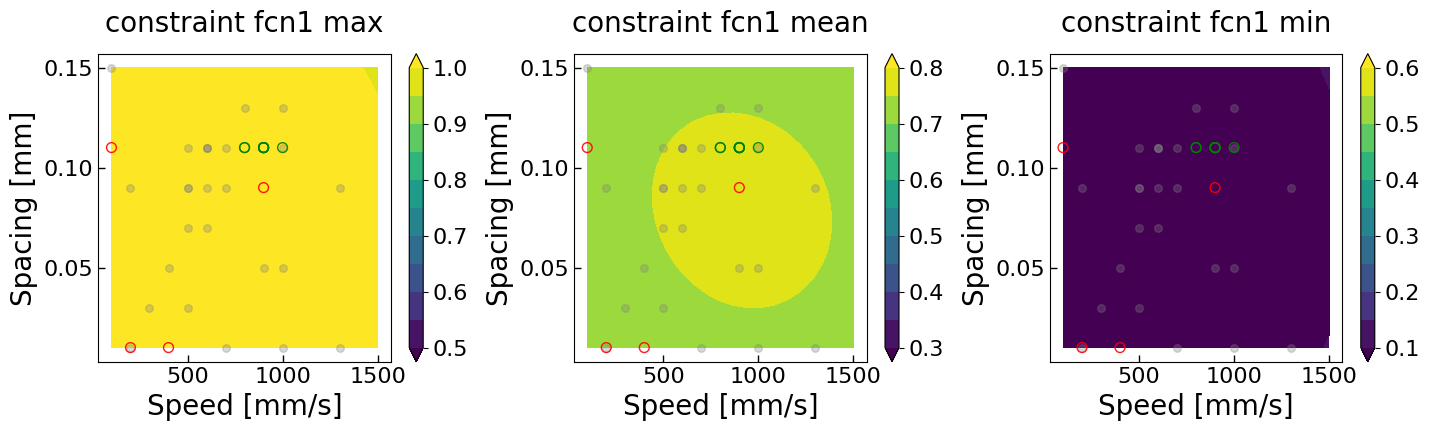

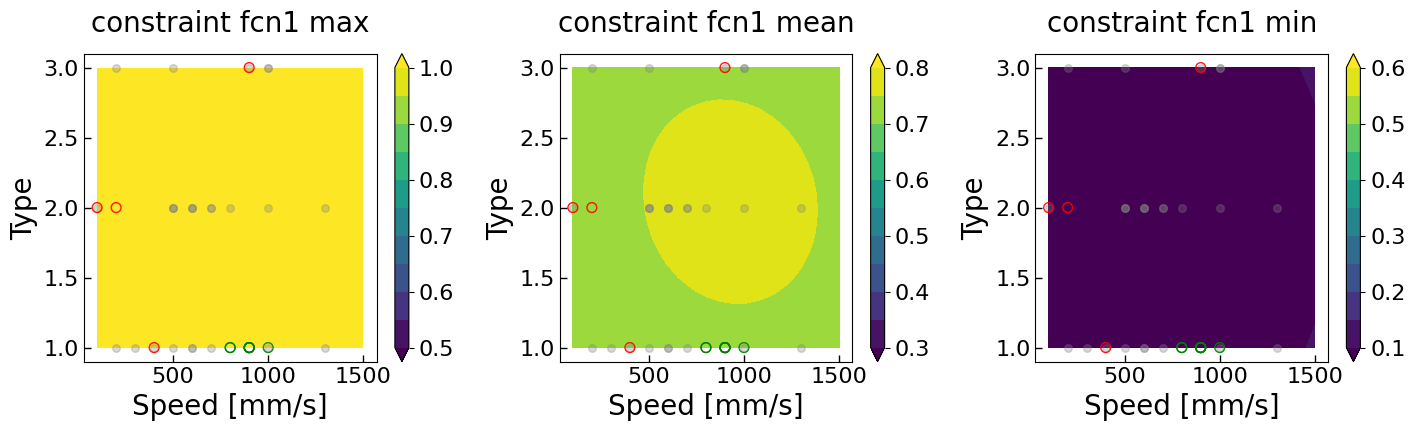

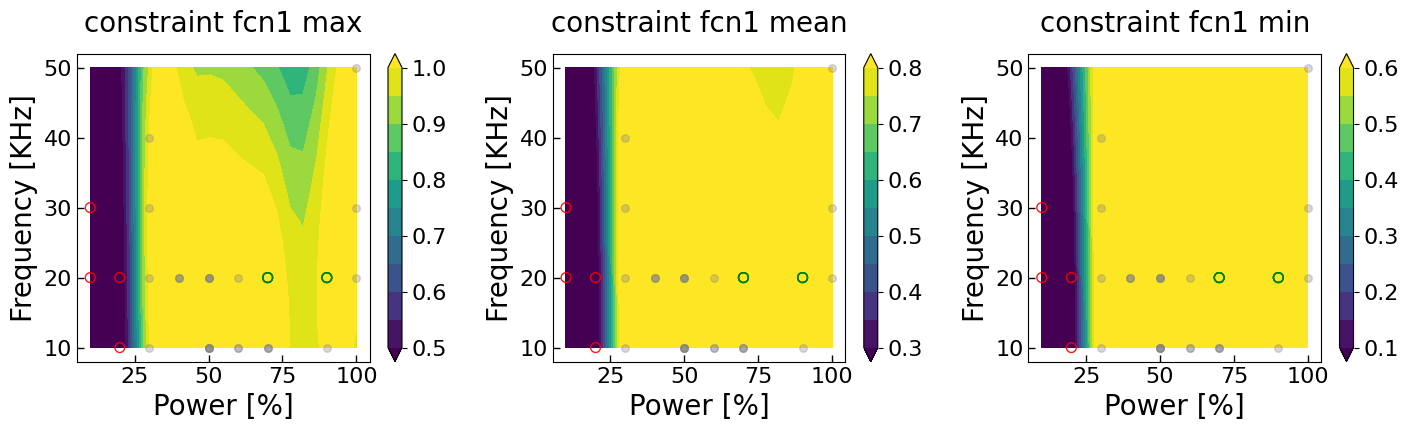

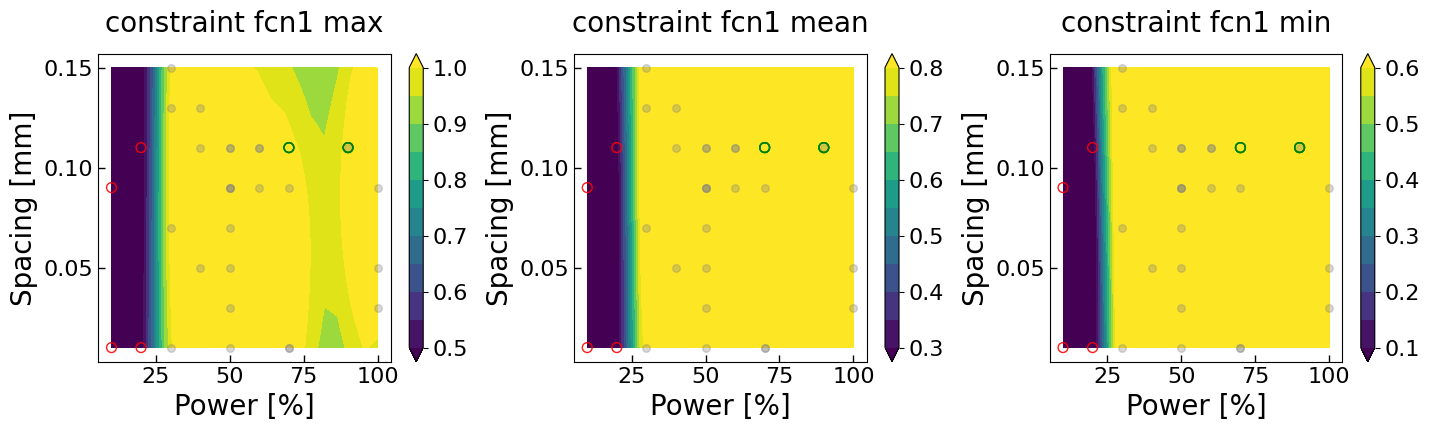

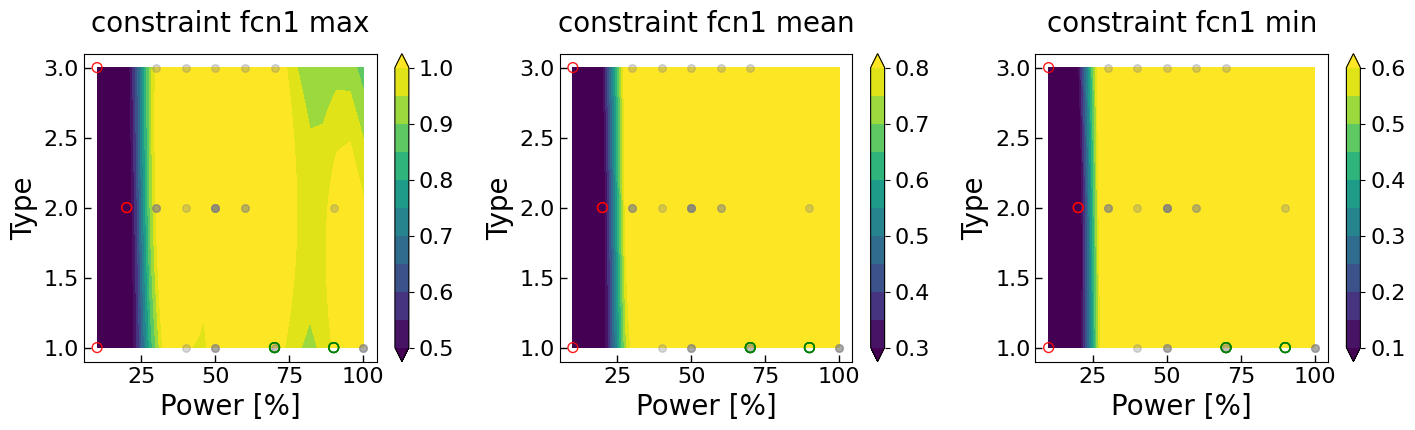

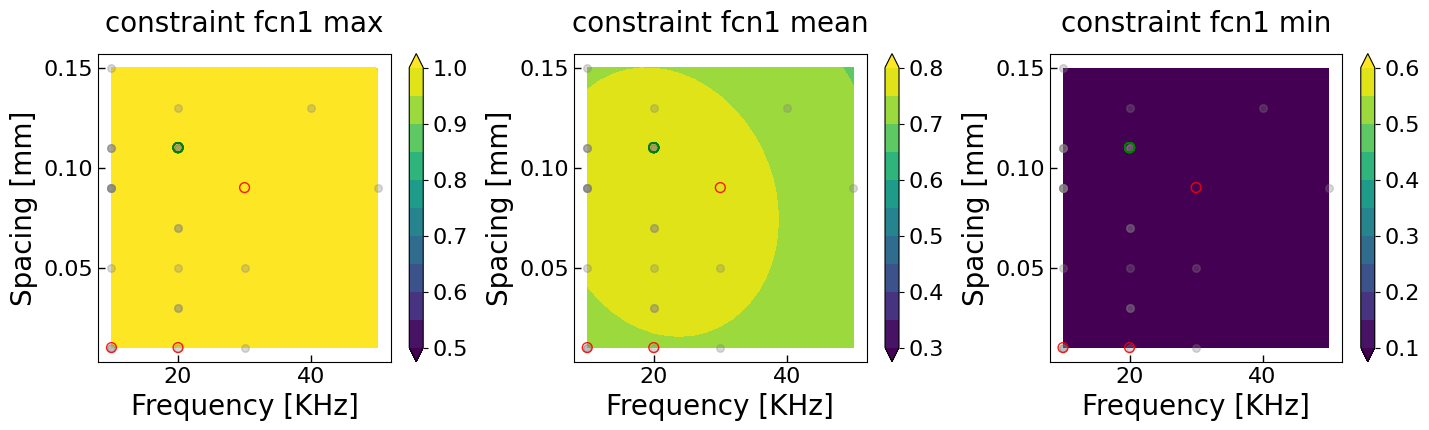

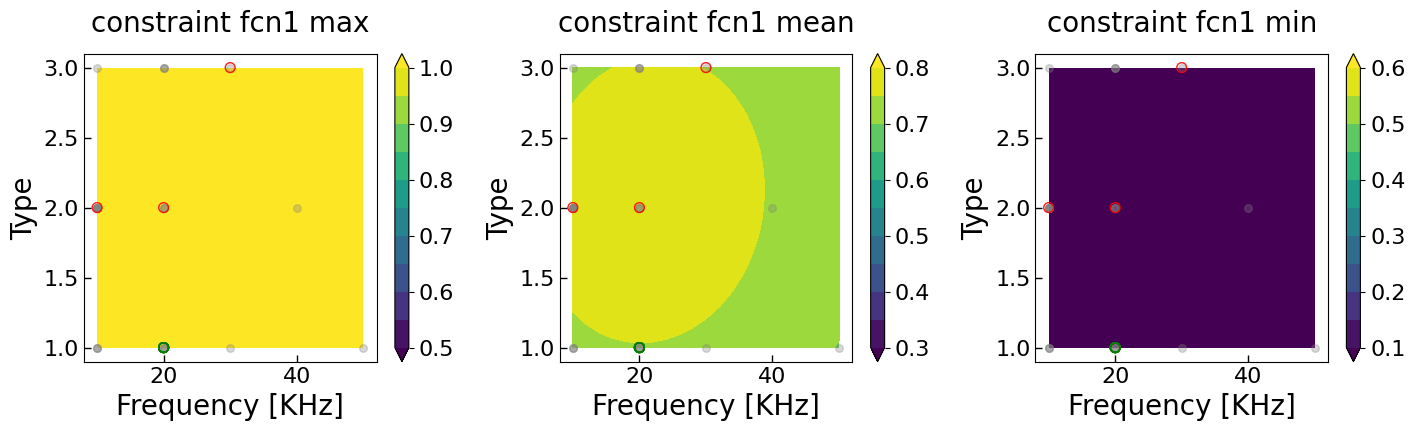

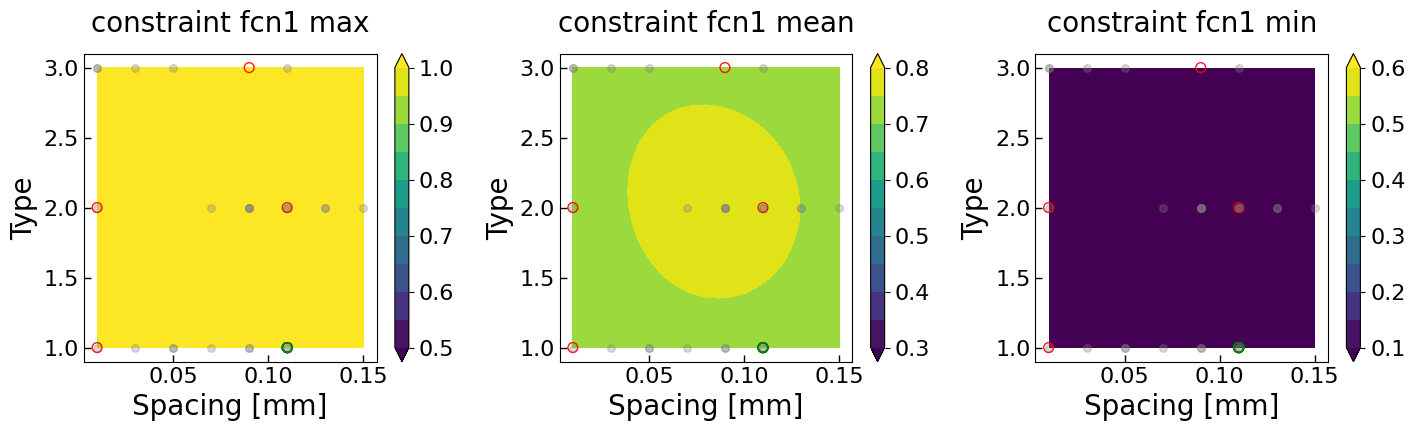

In [20]:
np.random.seed(10)
design = RandomDesign(parameter_space)
x_sampled = design.get_samples(200)
x_columns = df_film.iloc[:,1:7].columns
for i in range(input_dim):
    for j in range(input_dim-i-1):
        ind1 = i
        ind2 = j+i+1
        n_steps =21
        x1x2y_pred, x1x2y_var =[[],[]]
        for x1 in np.linspace(0, 1, n_steps):
            for x2 in np.linspace(0, 1, n_steps):
                x_temp = np.copy(x_sampled)
                x_temp[:,ind1] = x1
                x_temp[:,ind2] = x2
                yc_pr, yc_var = f_cons1(x_temp)
                yc_pr = -yc_pr+yc_offset
                x1_org = x_denormalizer(x_temp)[0,ind1]
                x2_org = x_denormalizer(x_temp)[0,ind2]
                x1x2y_pred.append([x1_org, x2_org, np.max(yc_pr), np.mean(yc_pr), np.min(yc_pr)])
                
        x1c = np.array(x1x2y_pred, dtype=object)[:,0].reshape(n_steps, n_steps)
        x2c = np.array(x1x2y_pred, dtype=object)[:,1].reshape(n_steps, n_steps)
        yc_pr_max = np.array(x1x2y_pred, dtype=object)[:,2].reshape(n_steps, n_steps)
        yc_pr_mean = np.array(x1x2y_pred, dtype=object)[:,3].reshape(n_steps, n_steps)
        yc_pr_min = np.array(x1x2y_pred, dtype=object)[:,4].reshape(n_steps, n_steps)
        
        fs = 20
        title_pad = 16
        
        fig,axes = plt.subplots(1, 3, figsize=(17, 4), sharey = False, sharex = False)
        colorbar_offset = [0.5, 0.3, 0.1]
        for ax, y, c_offset in zip(axes, [yc_pr_max, yc_pr_mean, yc_pr_min],colorbar_offset):
            c_plt1 = ax.contourf(x1c, x2c, y, levels = np.arange(11)*0.05+c_offset, cmap='viridis', extend = 'both')## viridis 
            cbar = fig.colorbar(c_plt1, ax= ax)
            cbar.ax.tick_params(labelsize=fs*0.8)
            ax.scatter(x_denormalizer(X)[:, ind1], 
                       x_denormalizer(X)[:, ind2], 
                       s = 30, facecolors='gray', alpha = 0.3, edgecolor = 'gray')
            ax.scatter(x_denormalizer(Xc[Yc[:,-1]==0])[:, ind1], 
                       x_denormalizer(Xc[Yc[:,-1]==0])[:, ind2], 
                       s = 50, facecolors='none', alpha = 0.9, edgecolor = 'red')     
            ax.scatter(x_denormalizer(X_new)[:, ind1], 
                       x_denormalizer(X_new)[:, ind2], 
                       s = 50, facecolors='none', alpha = 0.9, edgecolor = 'green')
            
            ax.set_xlabel(str(x_columns[ind1]), fontsize = fs)
            ax.set_ylabel(str(x_columns[ind2]), fontsize = fs)

            x1_delta = (np.max(x1c)-np.min(x1c))*0.05
            x2_delta = (np.max(x2c)-np.min(x2c))*0.05
            ax.set_xlim(np.min(x1c)-x1_delta, np.max(x1c)+x1_delta)
            ax.set_ylim(np.min(x2c)-x2_delta, np.max(x2c)+x2_delta)
            ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
            
                                
        axes[0].set_title('constraint fcn1 max', pad = title_pad, fontsize = fs)
        axes[1].set_title('constraint fcn1 mean', pad = title_pad, fontsize = fs)
        axes[2].set_title('constraint fcn1 min', pad = title_pad, fontsize = fs)
        plt.subplots_adjust(wspace = 0.3)
        plt.show()

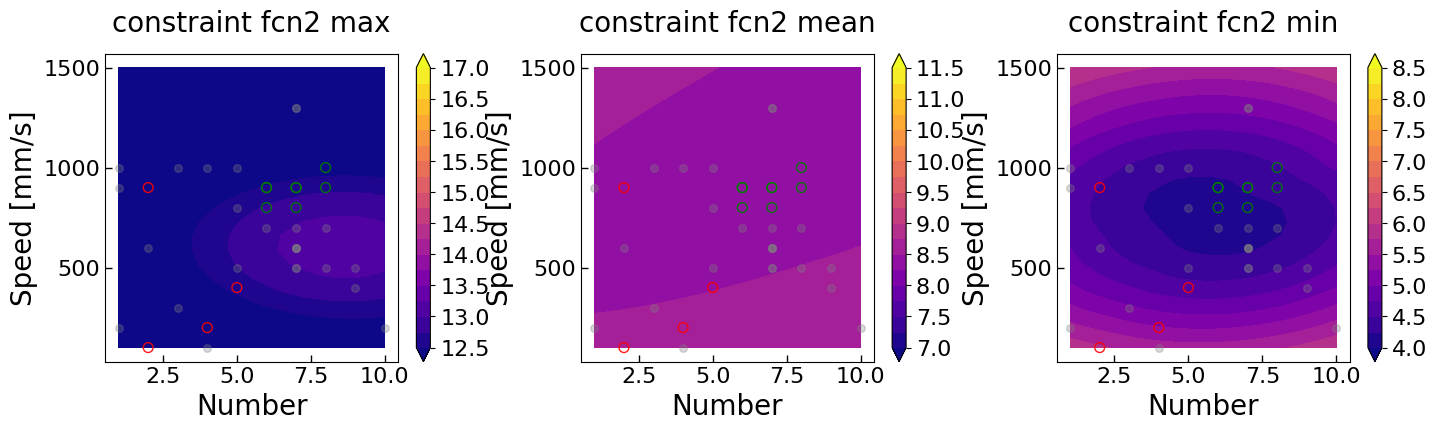

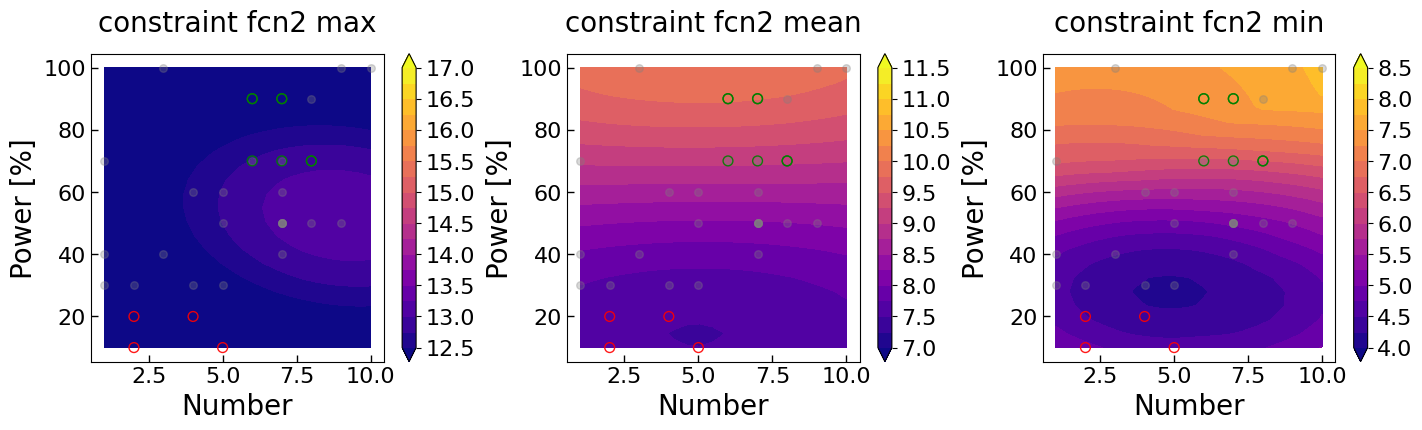

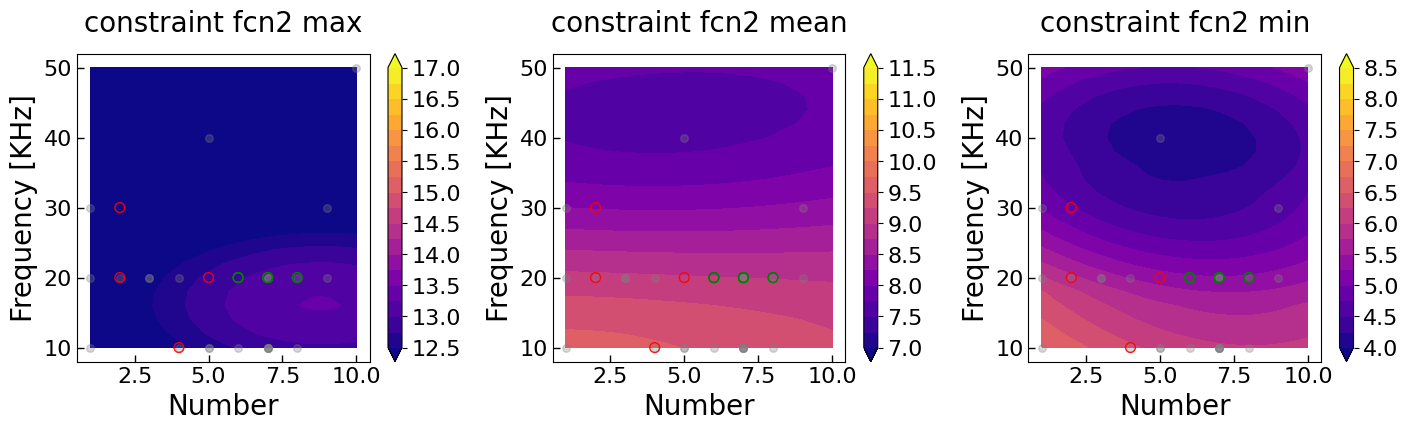

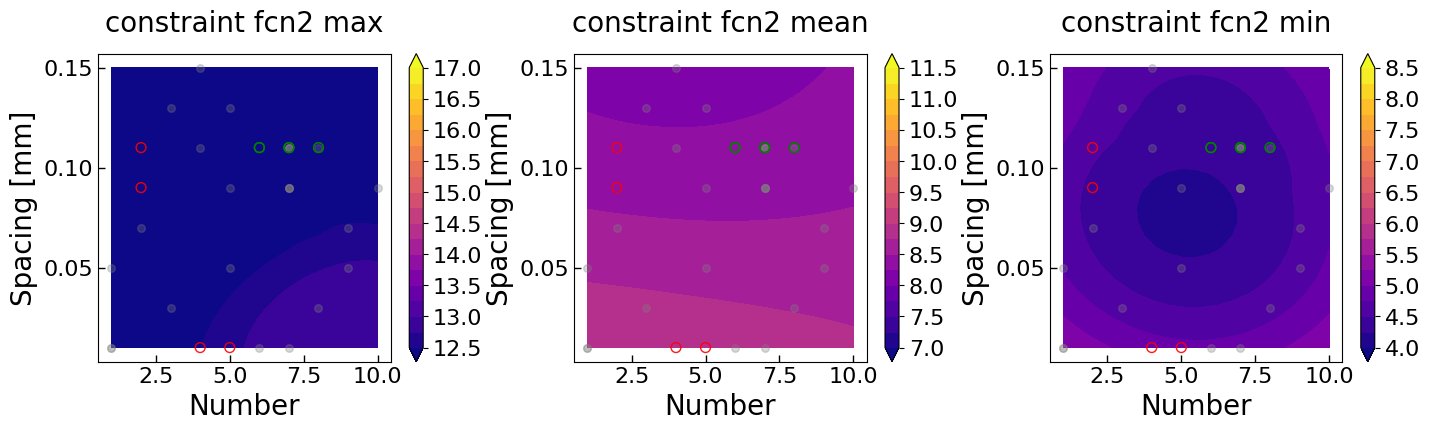

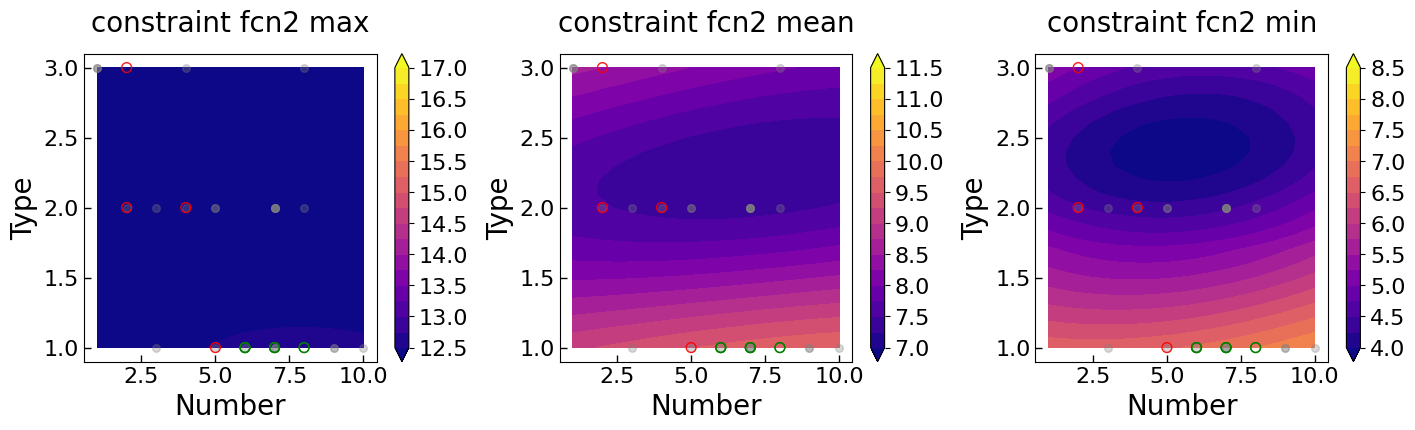

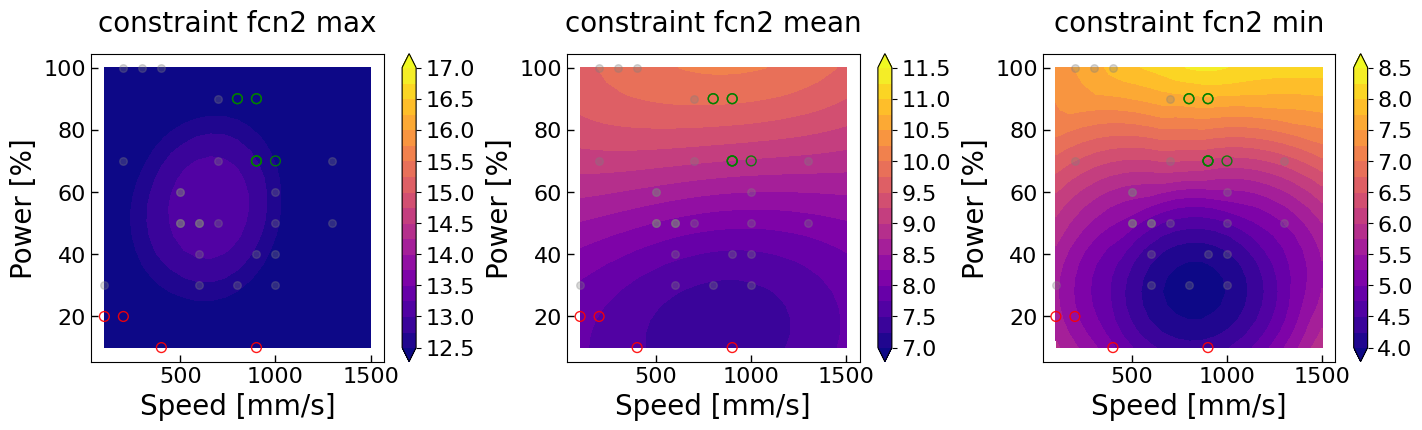

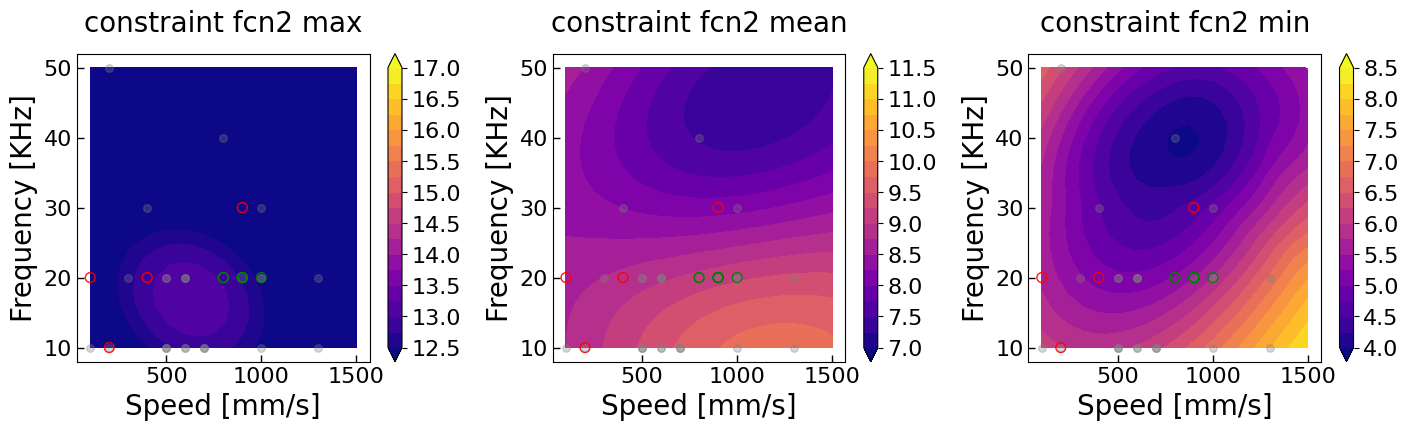

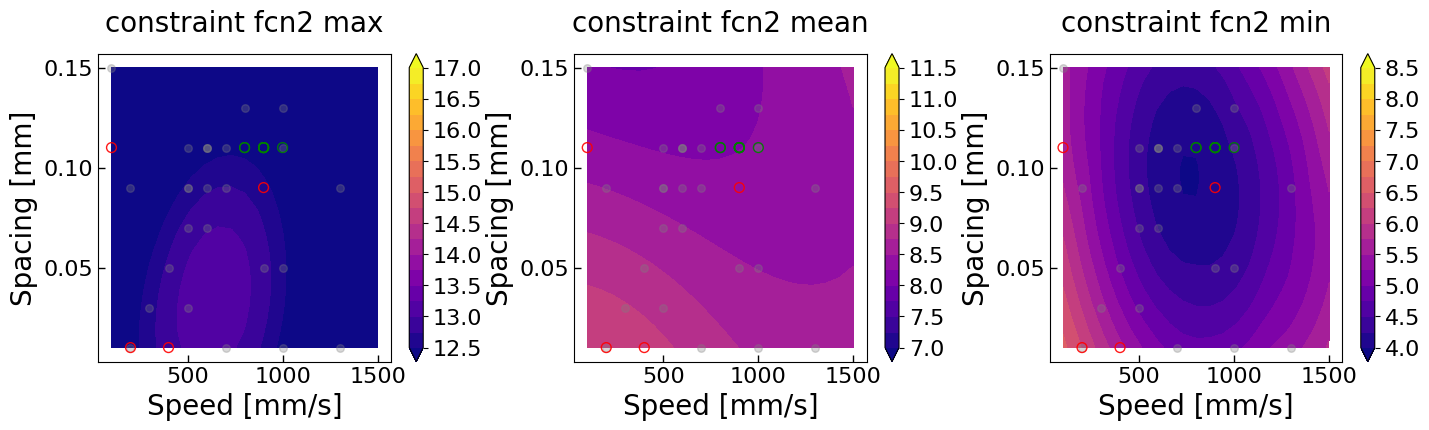

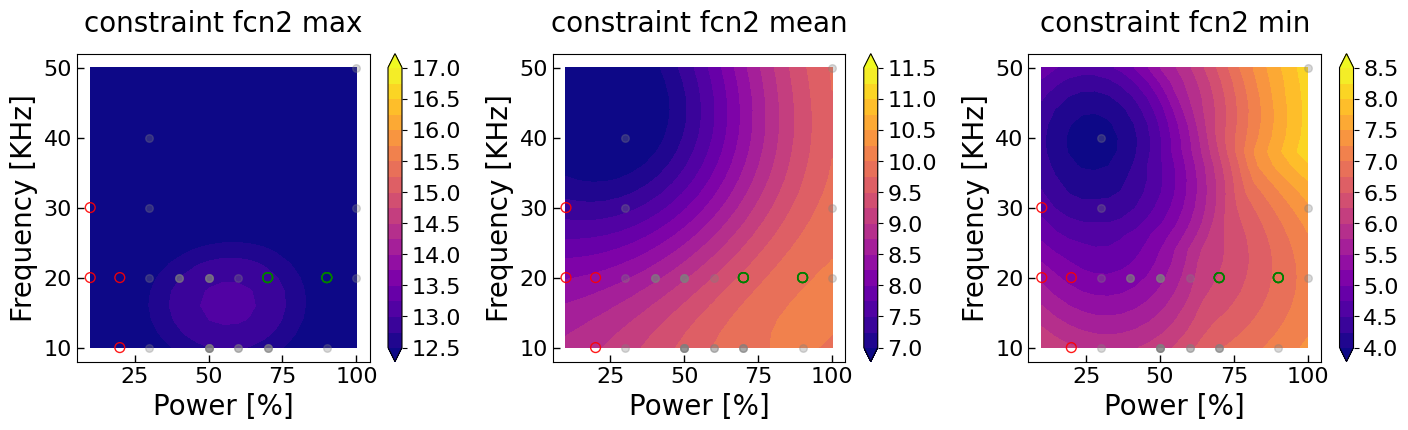

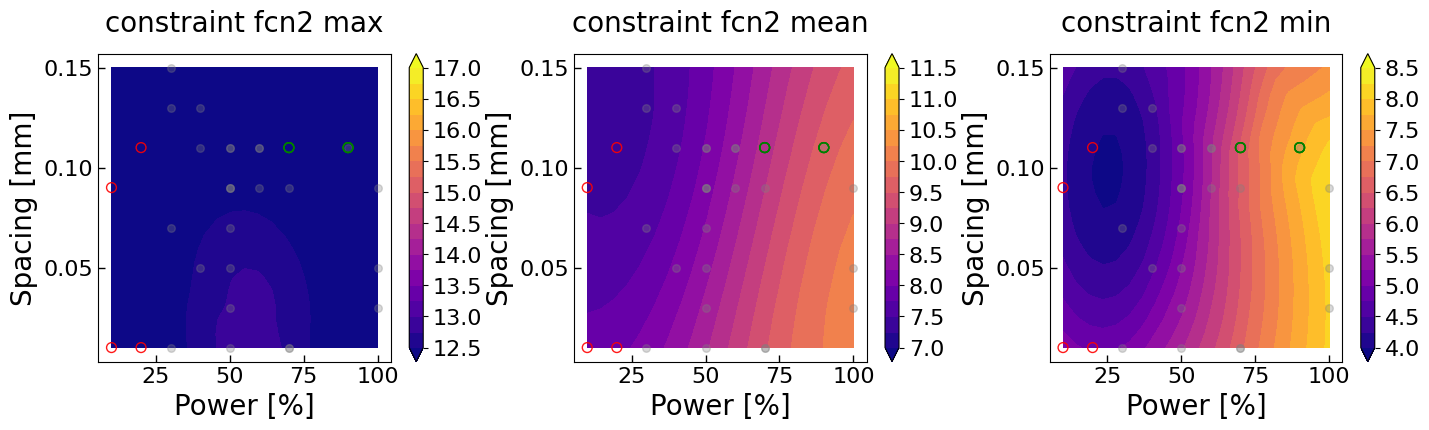

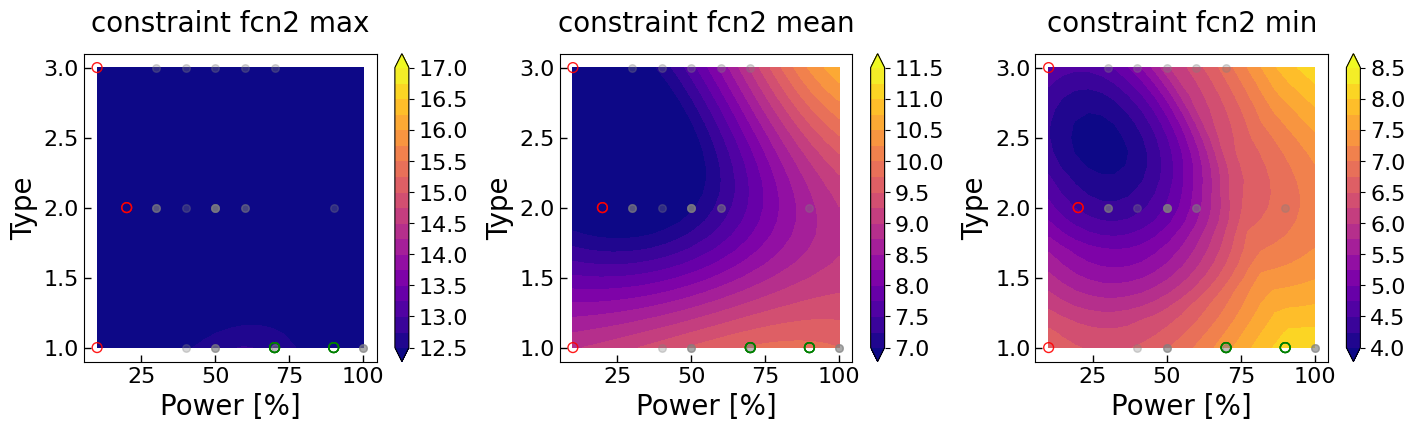

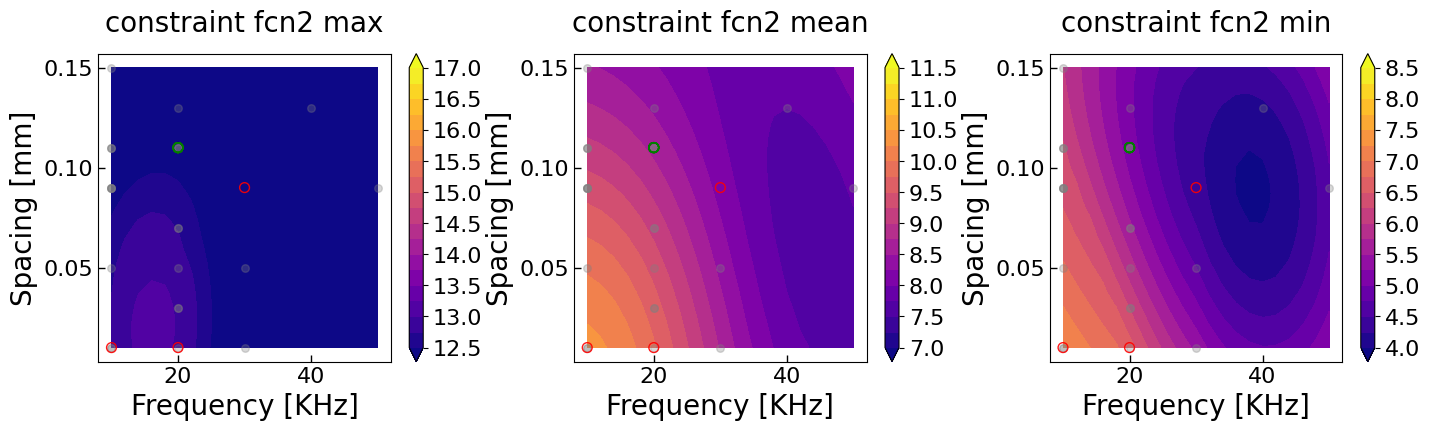

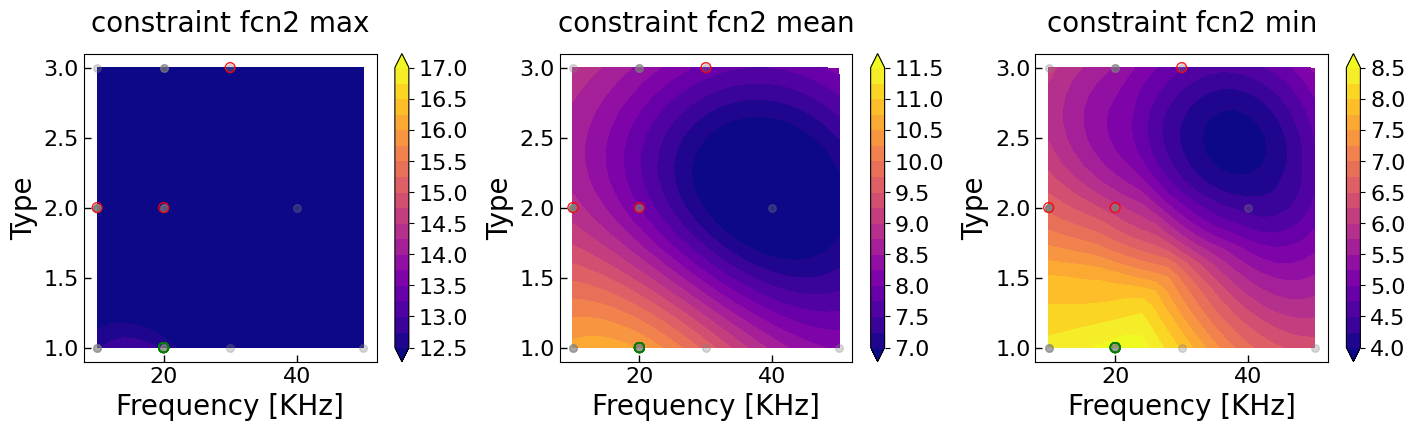

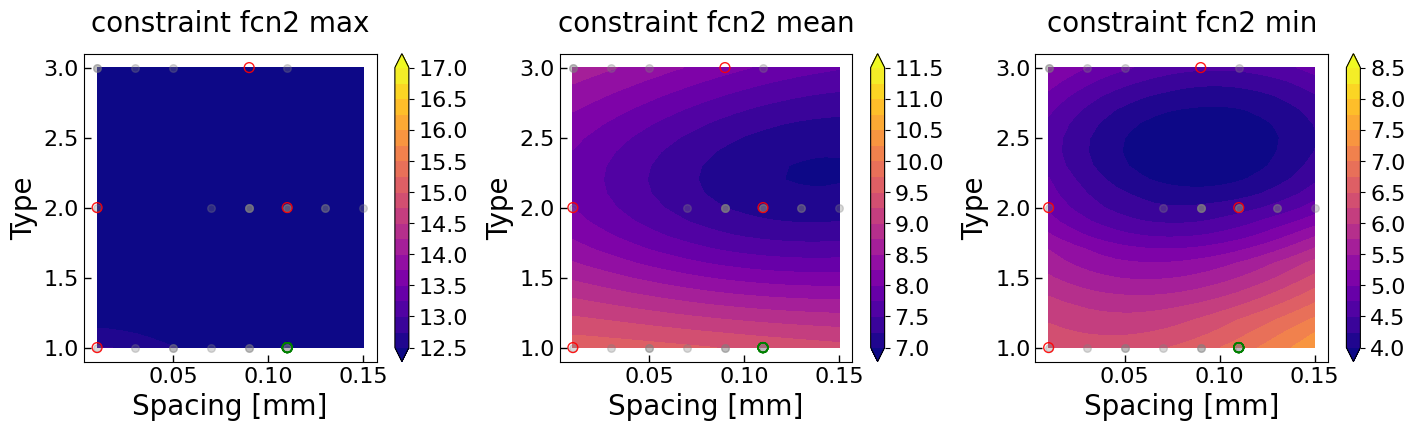

In [21]:
np.random.seed(10)
design = RandomDesign(parameter_space)
x_sampled = design.get_samples(200)
x_columns = df_film.iloc[:,1:7].columns
for i in range(input_dim):
    for j in range(input_dim-i-1):
        ind1 = i
        ind2 = j+i+1
        n_steps =21
        x1x2y_pred, x1x2y_var =[[],[]]
        for x1 in np.linspace(0, 1, n_steps):
            for x2 in np.linspace(0, 1, n_steps):
                x_temp = np.copy(x_sampled)
                x_temp[:,ind1] = x1
                x_temp[:,ind2] = x2
                yc_pr, yc_var = f_cons2(x_temp)
                yc_pr = -yc_pr+yc2_offset
                x1_org = x_denormalizer(x_temp)[0,ind1]
                x2_org = x_denormalizer(x_temp)[0,ind2]
                x1x2y_pred.append([x1_org, x2_org, np.max(yc_pr), np.mean(yc_pr), np.min(yc_pr)])
                
        x1c = np.array(x1x2y_pred, dtype=object)[:,0].reshape(n_steps, n_steps)
        x2c = np.array(x1x2y_pred, dtype=object)[:,1].reshape(n_steps, n_steps)
        yc_pr_max = np.array(x1x2y_pred, dtype=object)[:,2].reshape(n_steps, n_steps)
        yc_pr_mean = np.array(x1x2y_pred, dtype=object)[:,3].reshape(n_steps, n_steps)
        yc_pr_min = np.array(x1x2y_pred, dtype=object)[:,4].reshape(n_steps, n_steps)

        fs = 20
        title_pad = 16
        
        fig,axes = plt.subplots(1, 3, figsize=(17, 4), sharey = False, sharex = False)
        colorbar_offset = [12.5, 7, 4]
        for ax, y, c_offset in zip(axes, [yc_pr_max, yc_pr_mean, yc_pr_min],colorbar_offset):
            c_plt1 = ax.contourf(x1c, x2c, y, levels = np.arange(19)*0.25+c_offset, cmap='plasma', extend = 'both')
            cbar = fig.colorbar(c_plt1, ax= ax)
            cbar.ax.tick_params(labelsize=fs*0.8)
            ax.scatter(x_denormalizer(X)[:, ind1], 
                       x_denormalizer(X)[:, ind2], 
                       s = 30, facecolors='gray', alpha = 0.3, edgecolor = 'gray')
            ax.scatter(x_denormalizer(Xc[Yc[:,-1]==0])[:, ind1], 
                       x_denormalizer(Xc[Yc[:,-1]==0])[:, ind2], 
                       s = 50, facecolors='none', alpha = 0.9, edgecolor = 'red')     
            ax.scatter(x_denormalizer(X_new)[:, ind1], 
                       x_denormalizer(X_new)[:, ind2], 
                       s = 50, facecolors='none', alpha = 0.9, edgecolor = 'green')
            
            ax.set_xlabel(str(x_columns[ind1]), fontsize = fs)
            ax.set_ylabel(str(x_columns[ind2]), fontsize = fs)

            x1_delta = (np.max(x1c)-np.min(x1c))*0.05
            x2_delta = (np.max(x2c)-np.min(x2c))*0.05
            ax.set_xlim(np.min(x1c)-x1_delta, np.max(x1c)+x1_delta)
            ax.set_ylim(np.min(x2c)-x2_delta, np.max(x2c)+x2_delta)
            ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)

                
        axes[0].set_title('constraint fcn2 max', pad = title_pad, fontsize = fs)
        axes[1].set_title('constraint fcn2 mean', pad = title_pad, fontsize = fs)
        axes[2].set_title('constraint fcn2 min', pad = title_pad, fontsize = fs)
        plt.subplots_adjust(wspace = 0.3)
        plt.show()

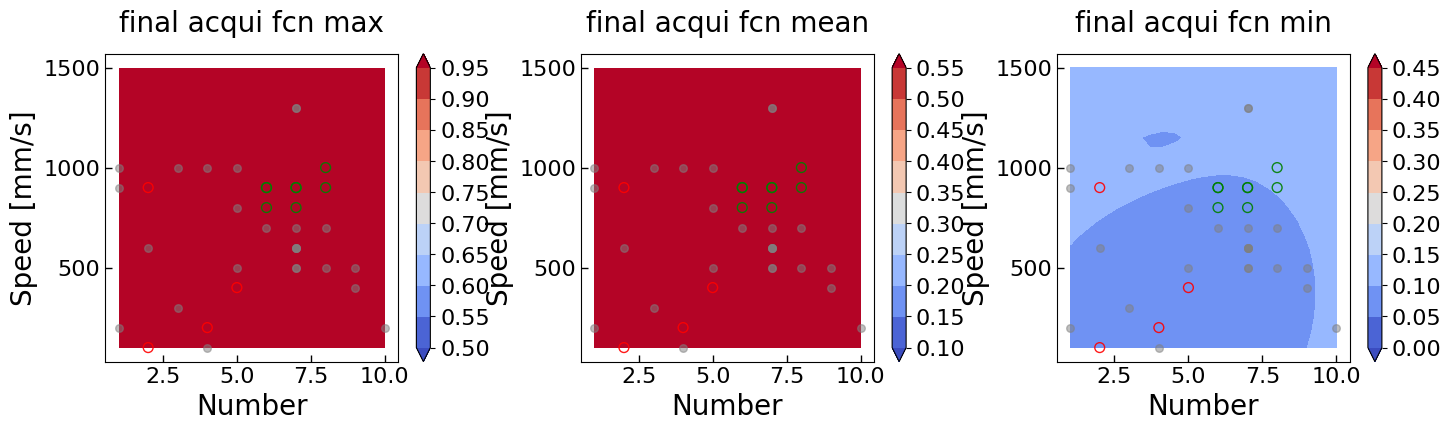

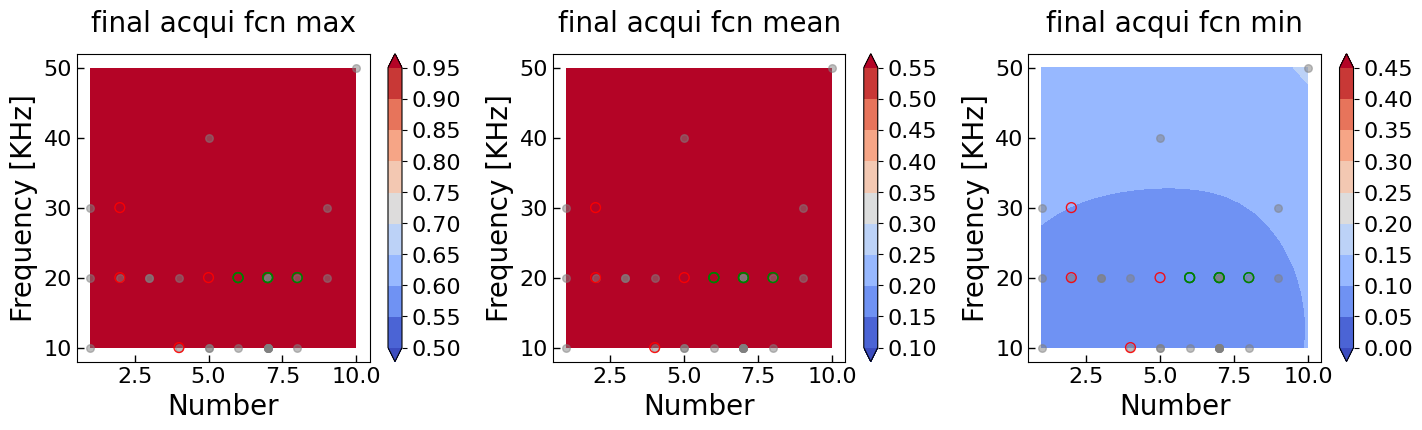

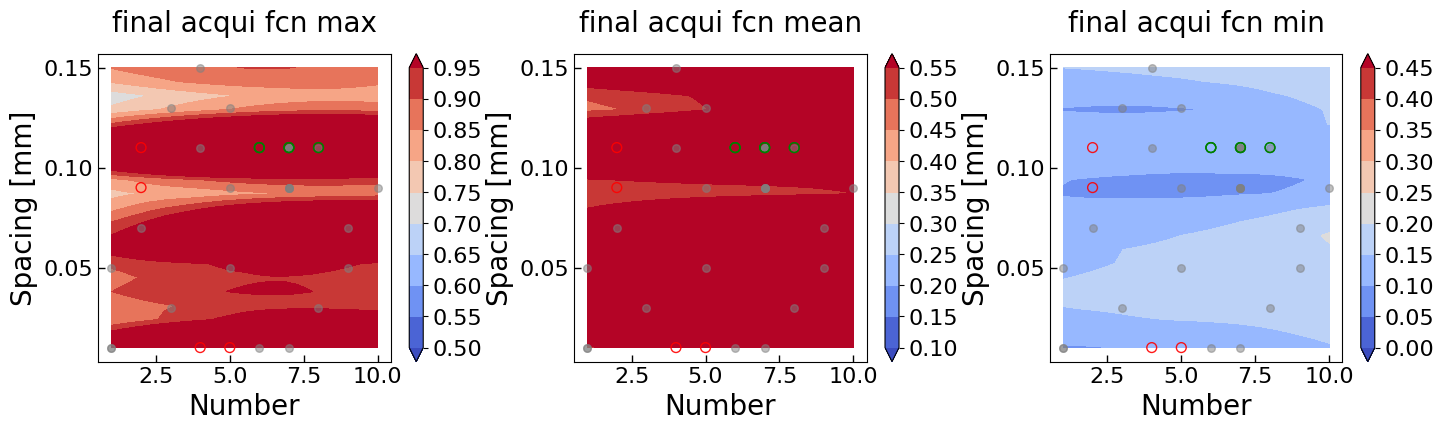

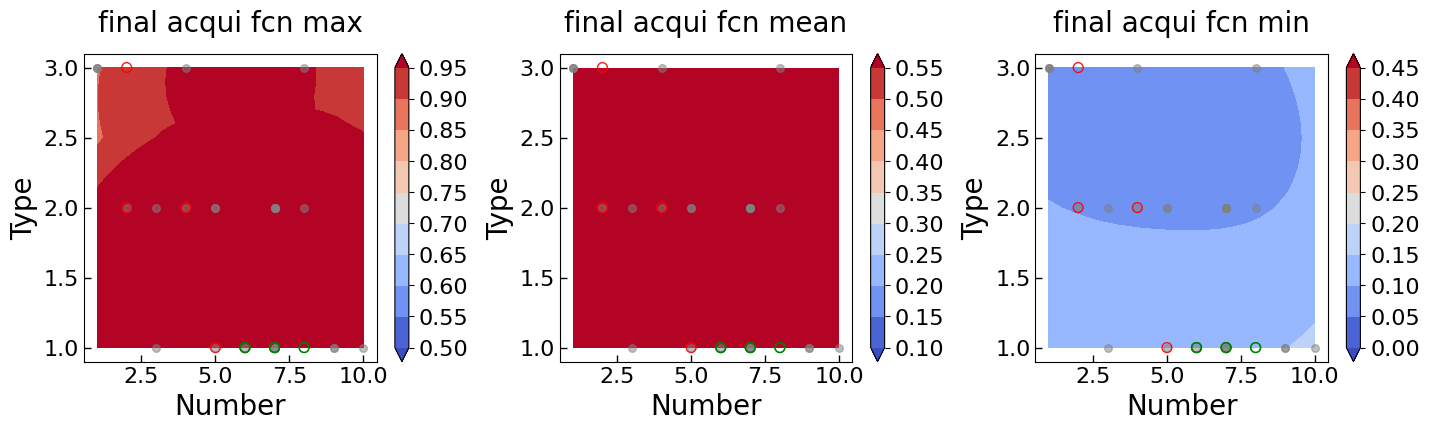

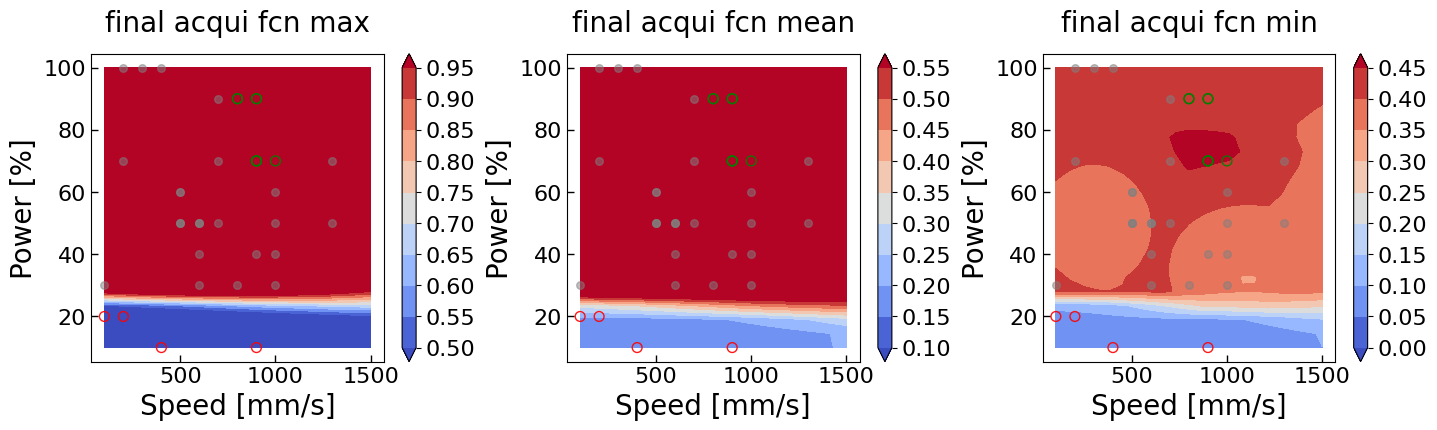

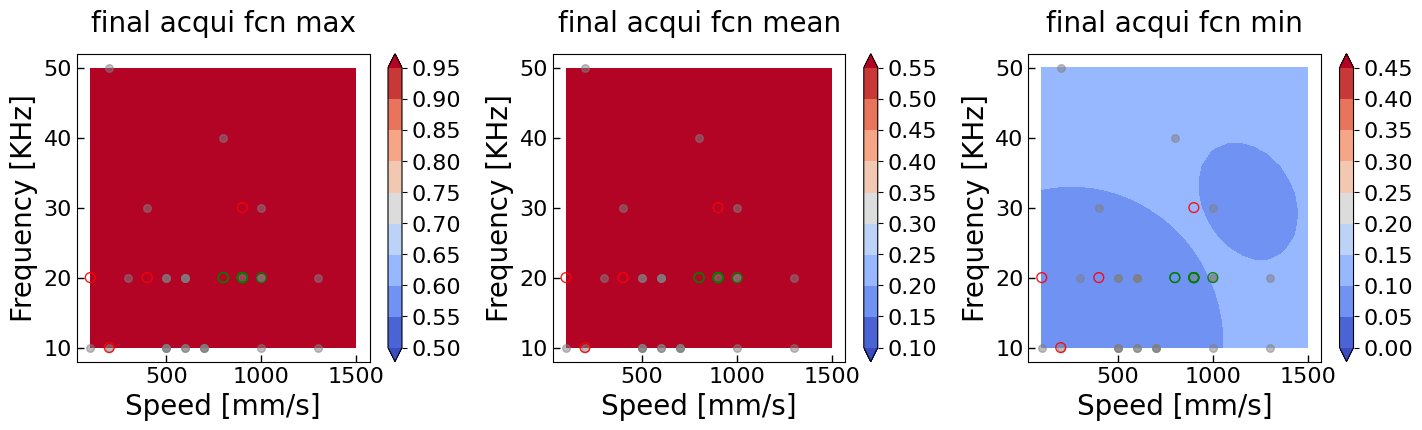

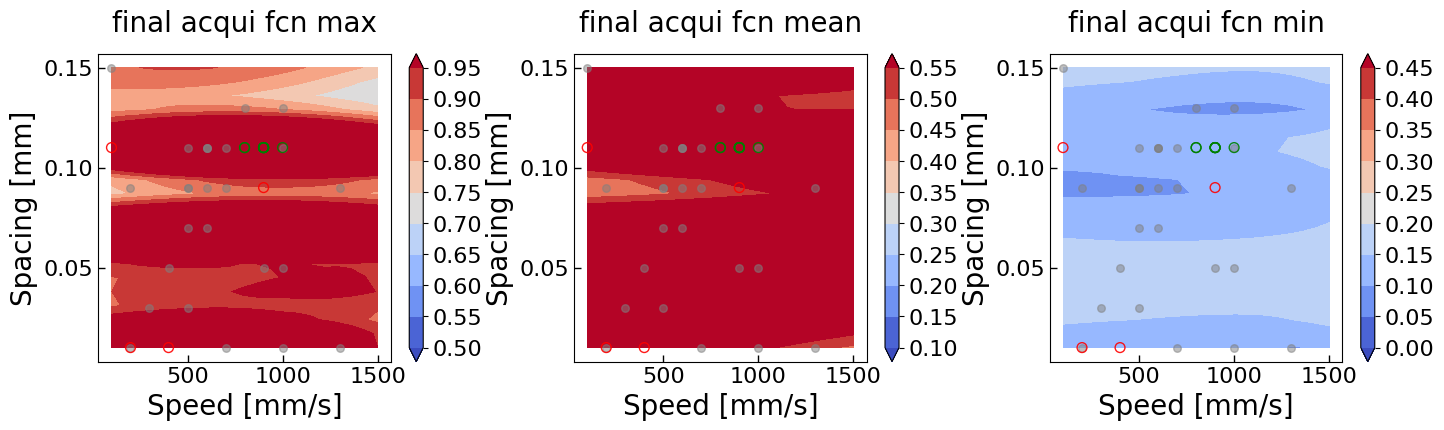

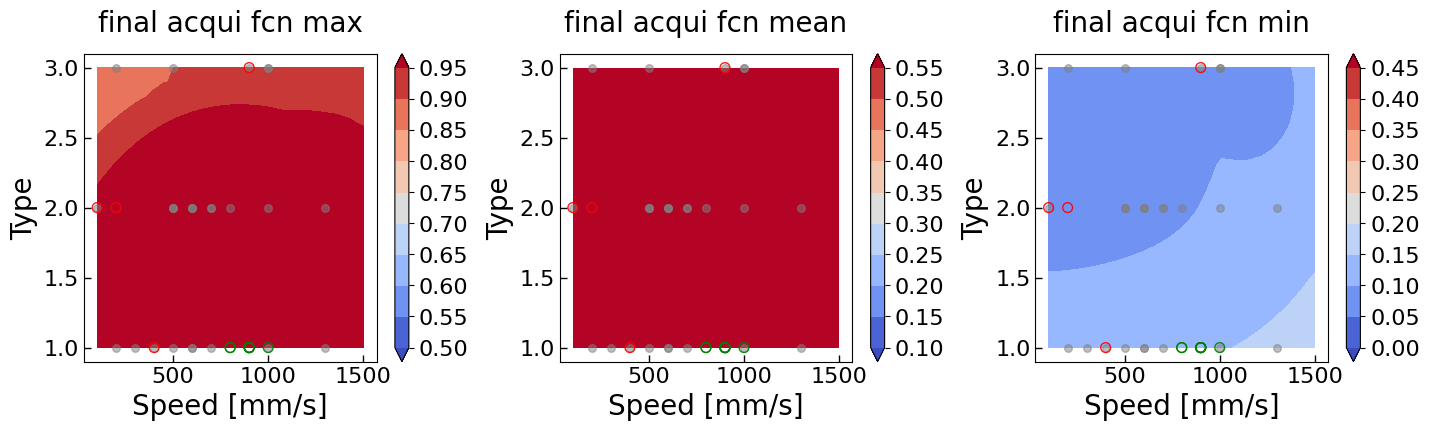

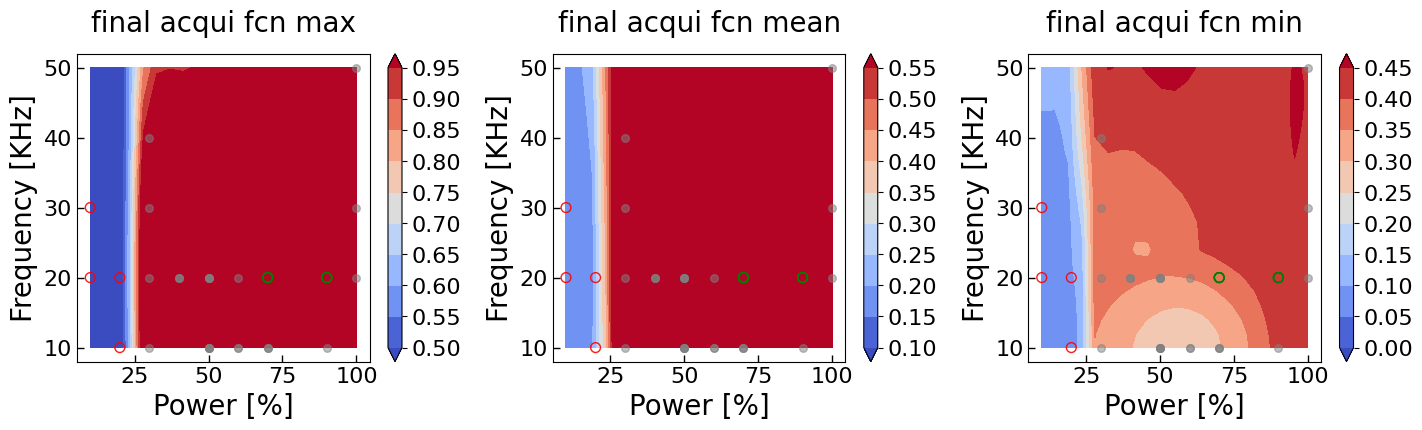

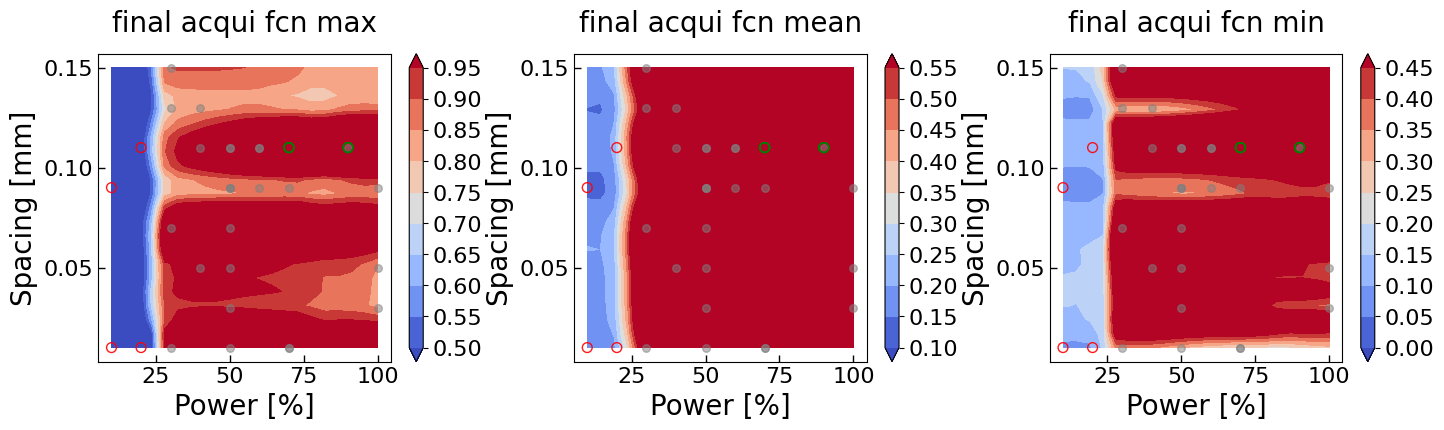

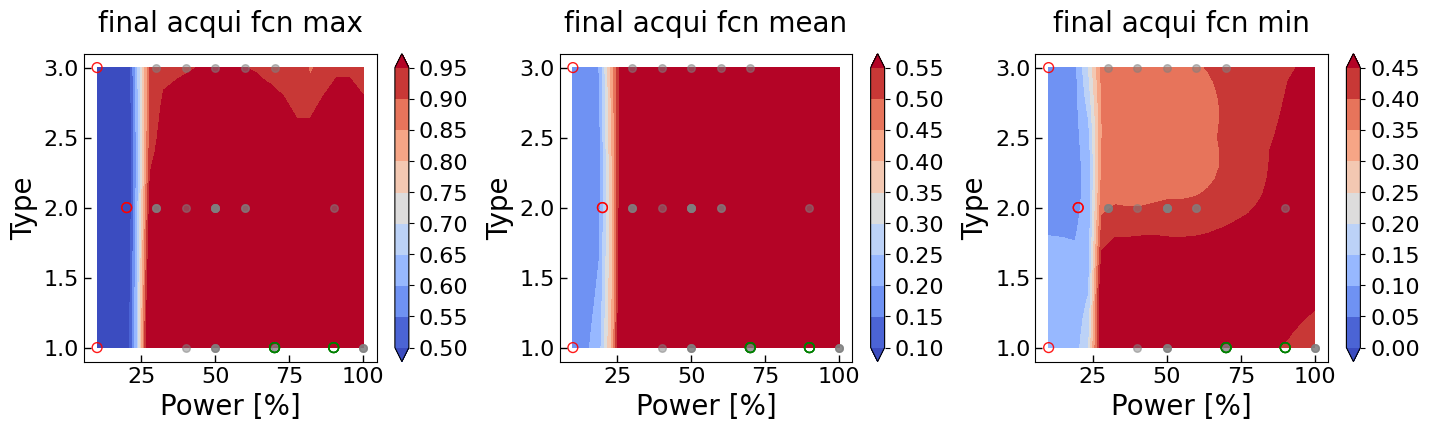

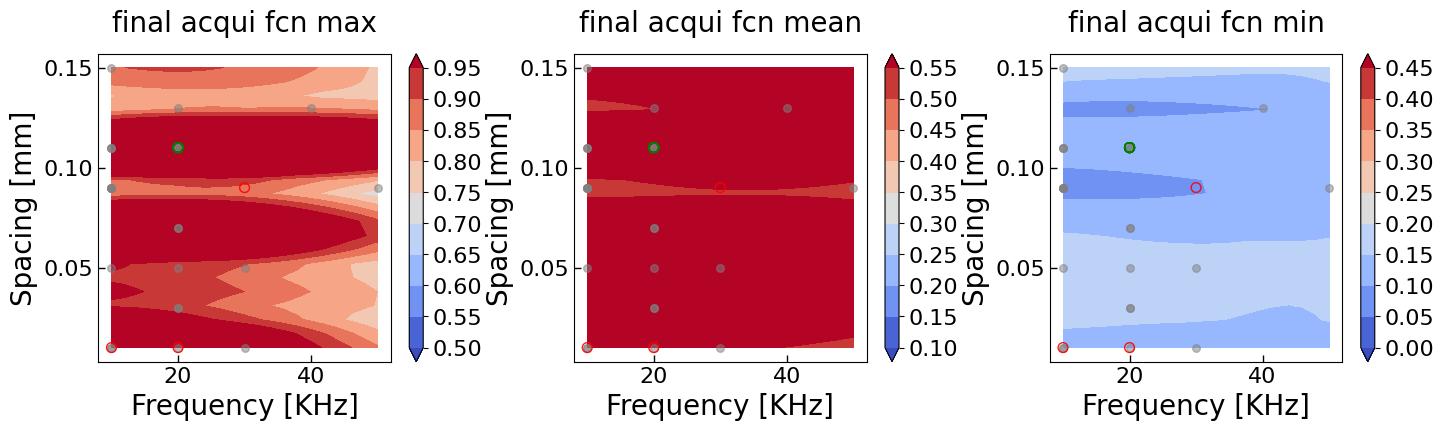

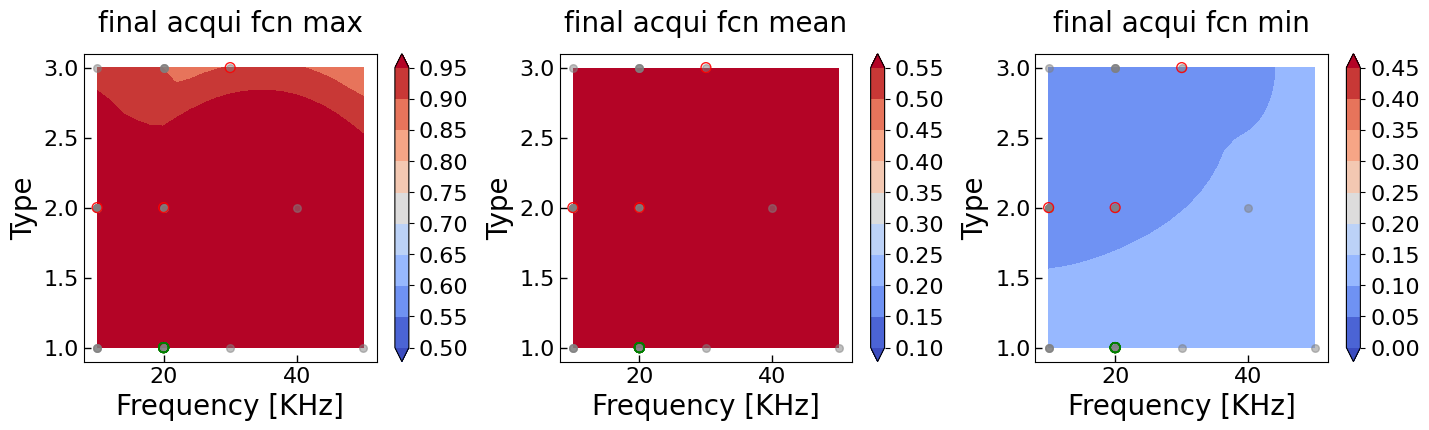

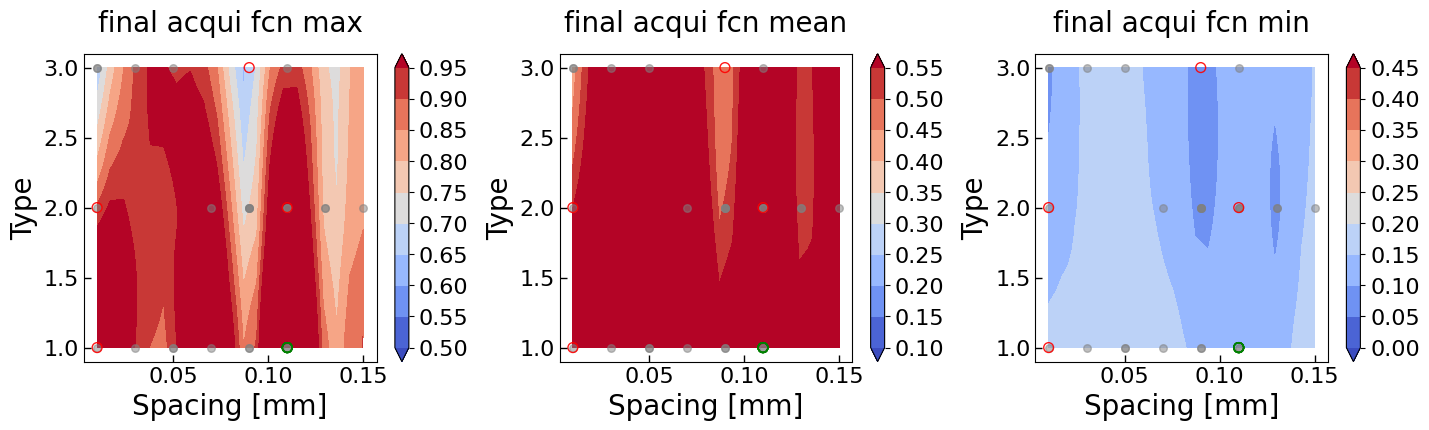

In [22]:
design = RandomDesign(parameter_space)
x_sampled = design.get_samples(200)
x_columns = df_film.iloc[:,1:7].columns
for i in range(input_dim):
    for j in range(input_dim-i-1):
        ind1 = i
        ind2 = j+i+1
        n_steps =21
        x1x2y_pred, x1x2y_var =[[],[]]
        for x1 in np.linspace(0, 1, n_steps):
            for x2 in np.linspace(0, 1, n_steps):
                x_temp = np.copy(x_sampled)
                x_temp[:,ind1] = x1
                x_temp[:,ind2] = x2
                yc_pr = f_cons_acq(x_temp)
                x1_org = x_denormalizer(x_temp)[0,ind1]
                x2_org = x_denormalizer(x_temp)[0,ind2]
                x1x2y_pred.append([x1_org, x2_org, np.max(yc_pr), np.mean(yc_pr), np.min(yc_pr)])
                
        x1c = np.array(x1x2y_pred, dtype=object)[:,0].reshape(n_steps, n_steps)
        x2c = np.array(x1x2y_pred, dtype=object)[:,1].reshape(n_steps, n_steps)
        yc_pr_max = np.array(x1x2y_pred, dtype=object)[:,2].reshape(n_steps, n_steps)
        yc_pr_mean = np.array(x1x2y_pred, dtype=object)[:,3].reshape(n_steps, n_steps)
        yc_pr_min = np.array(x1x2y_pred, dtype=object)[:,4].reshape(n_steps, n_steps)

        fs = 20
        title_pad = 16
        
        fig,axes = plt.subplots(1, 3, figsize=(17, 4), sharey = False, sharex = False)
        colorbar_offset = [0.5, 0.1, 0.0]
        for ax, y, c_offset in zip(axes, [yc_pr_max, yc_pr_mean, yc_pr_min],colorbar_offset):
            c_plt1 = ax.contourf(x1c, x2c, y/20, levels = np.arange(10)*0.05+c_offset, cmap='coolwarm', extend = 'both')# 
            cbar = fig.colorbar(c_plt1, ax= ax)
            cbar.ax.tick_params(labelsize=fs*0.8)
            ax.scatter(x_denormalizer(X)[:, ind1], 
                       x_denormalizer(X)[:, ind2], 
                       s = 30, facecolors='gray', alpha = 0.5, edgecolor = 'gray')
            ax.scatter(x_denormalizer(Xc[Yc[:,-1]==0])[:, ind1], 
                       x_denormalizer(Xc[Yc[:,-1]==0])[:, ind2], 
                       s = 50, facecolors='none', alpha = 0.9, edgecolor = 'red')
            ax.scatter(x_denormalizer(X_new)[:, ind1], 
                       x_denormalizer(X_new)[:, ind2], 
                       s = 50, facecolors='none', alpha = 0.9, edgecolor = 'green')
            ax.set_xlabel(str(x_columns[ind1]),fontsize = fs)
            ax.set_ylabel(str(x_columns[ind2]),fontsize = fs)

            x1_delta = (np.max(x1c)-np.min(x1c))*0.05
            x2_delta = (np.max(x2c)-np.min(x2c))*0.05
            ax.set_xlim(np.min(x1c)-x1_delta, np.max(x1c)+x1_delta)
            ax.set_ylim(np.min(x2c)-x2_delta, np.max(x2c)+x2_delta)
            ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)

            
        axes[0].set_title('final acqui fcn max', pad = title_pad,fontsize = fs)
        axes[1].set_title('final acqui fcn mean', pad = title_pad,fontsize = fs)
        axes[2].set_title('final acqui fcn min', pad = title_pad,fontsize = fs)
        plt.subplots_adjust(wspace = 0.3)
        plt.show()

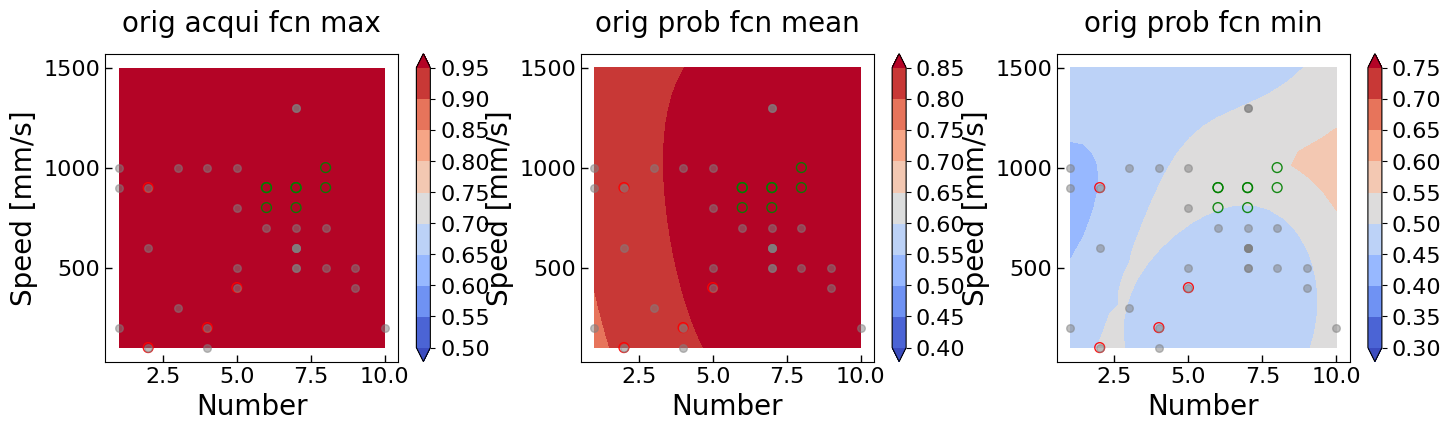

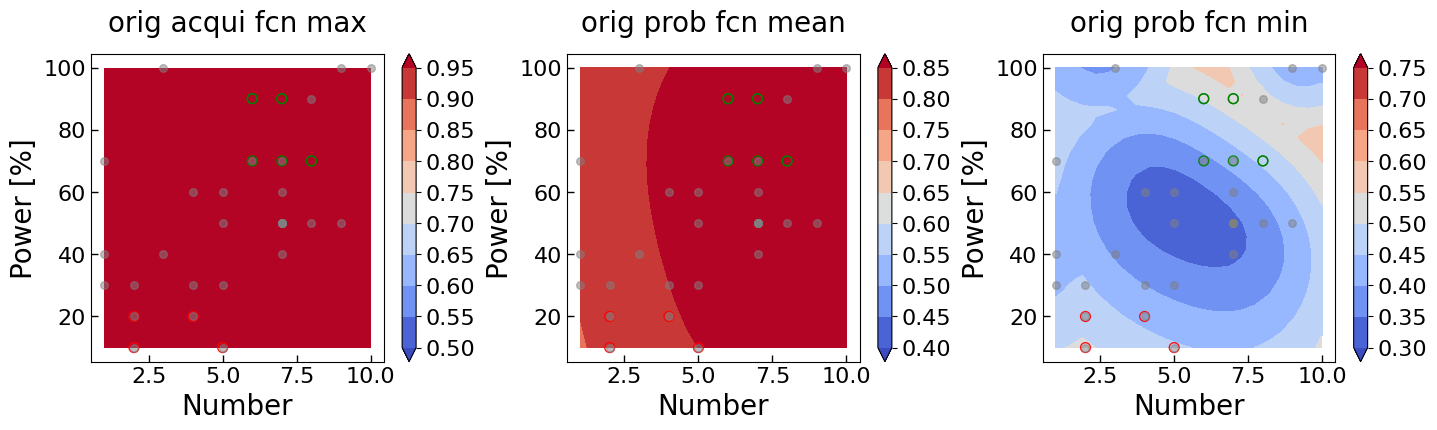

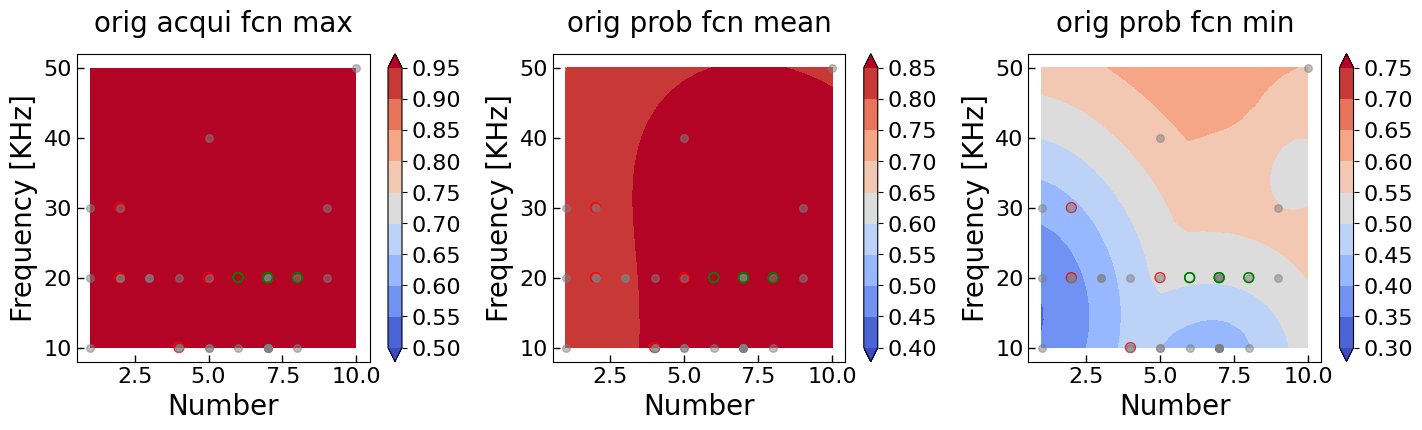

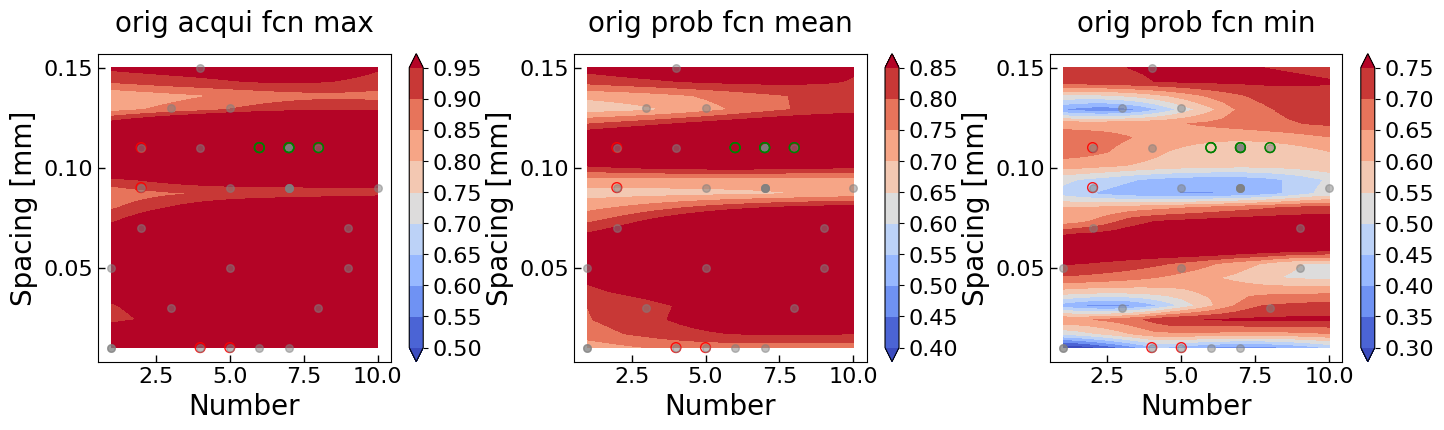

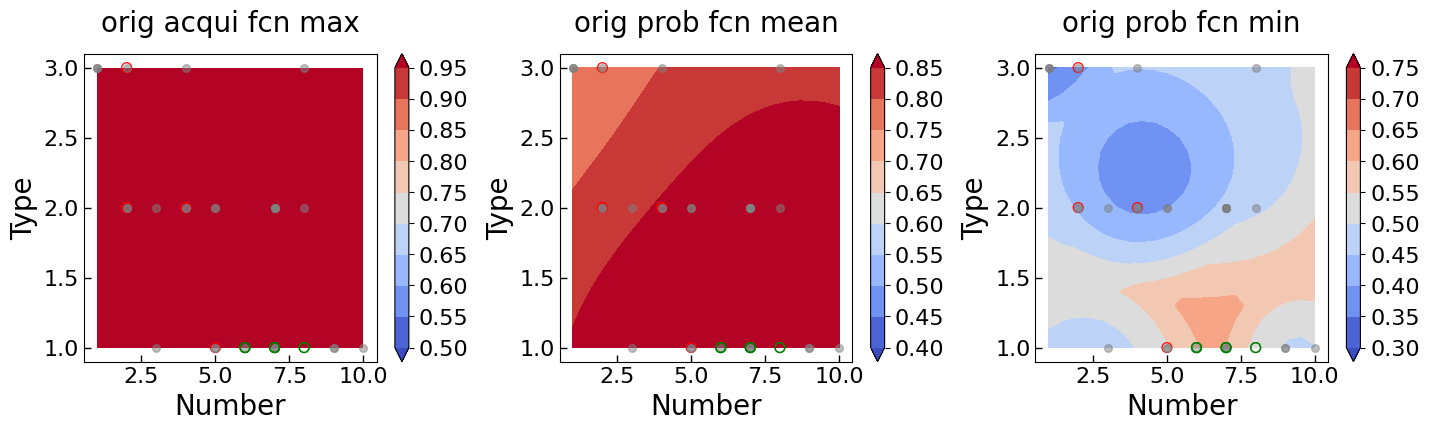

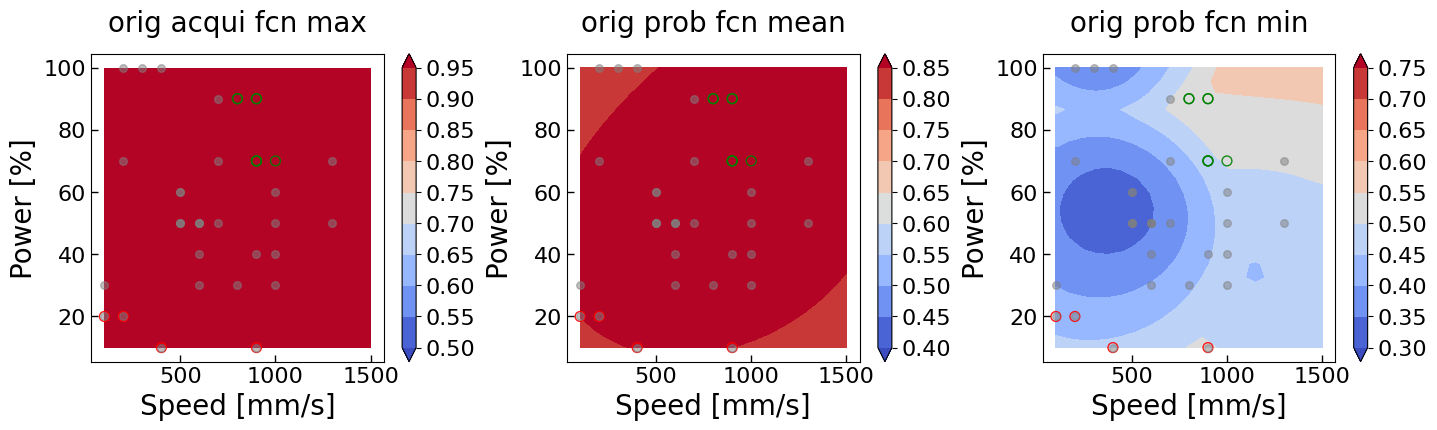

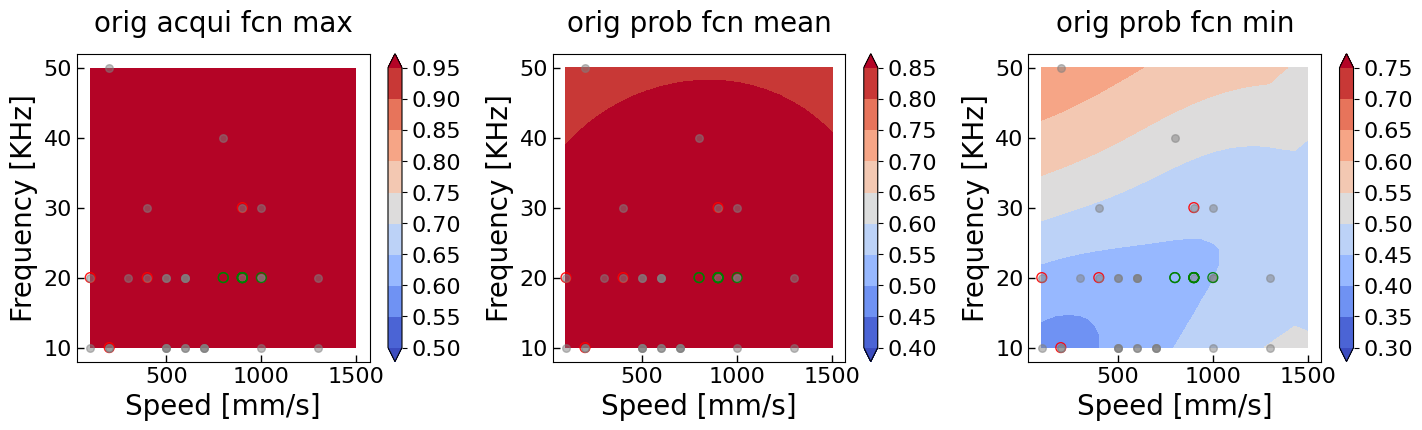

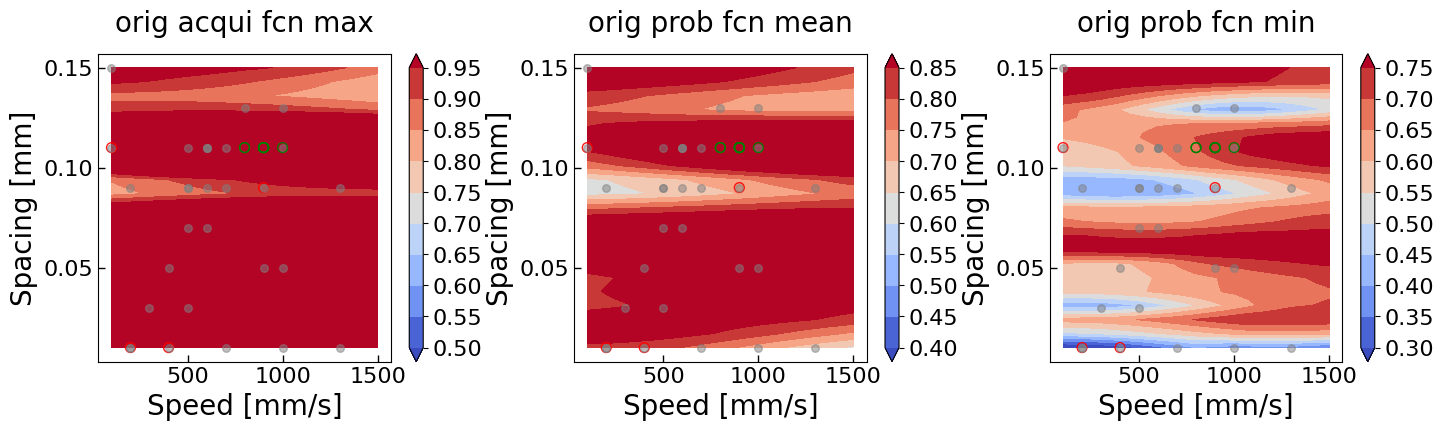

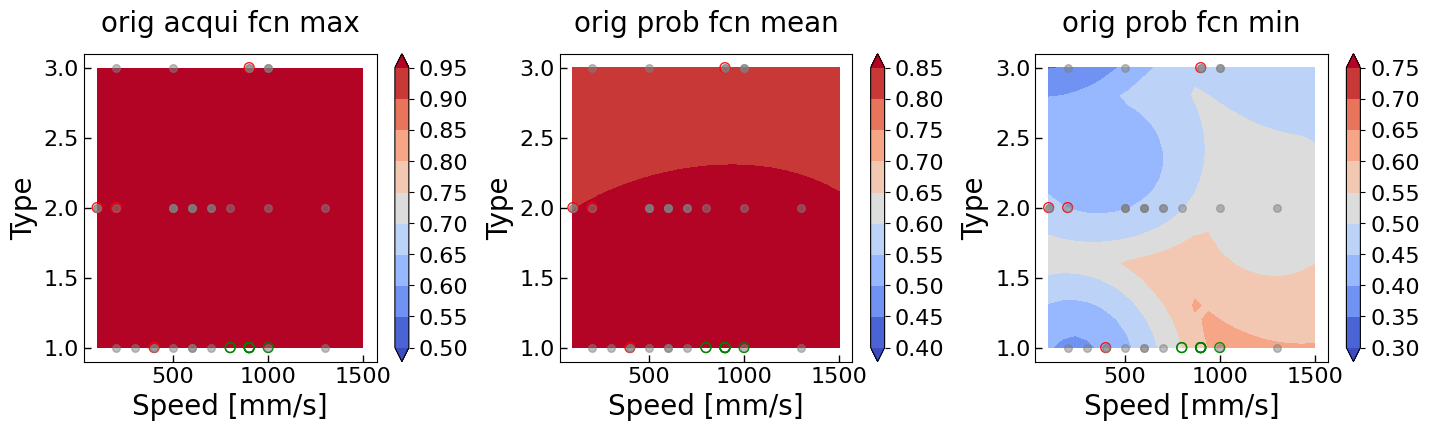

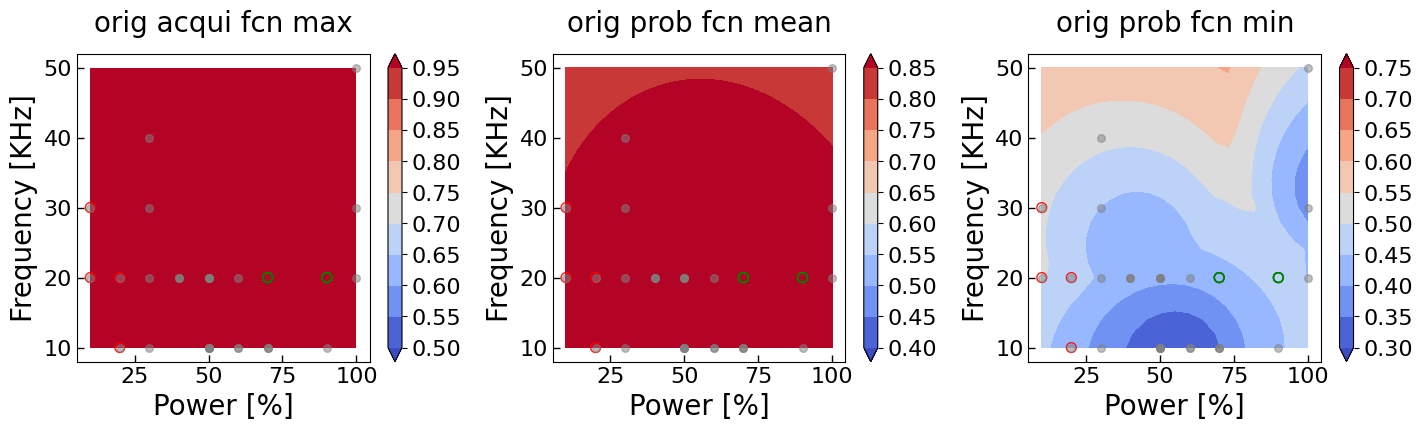

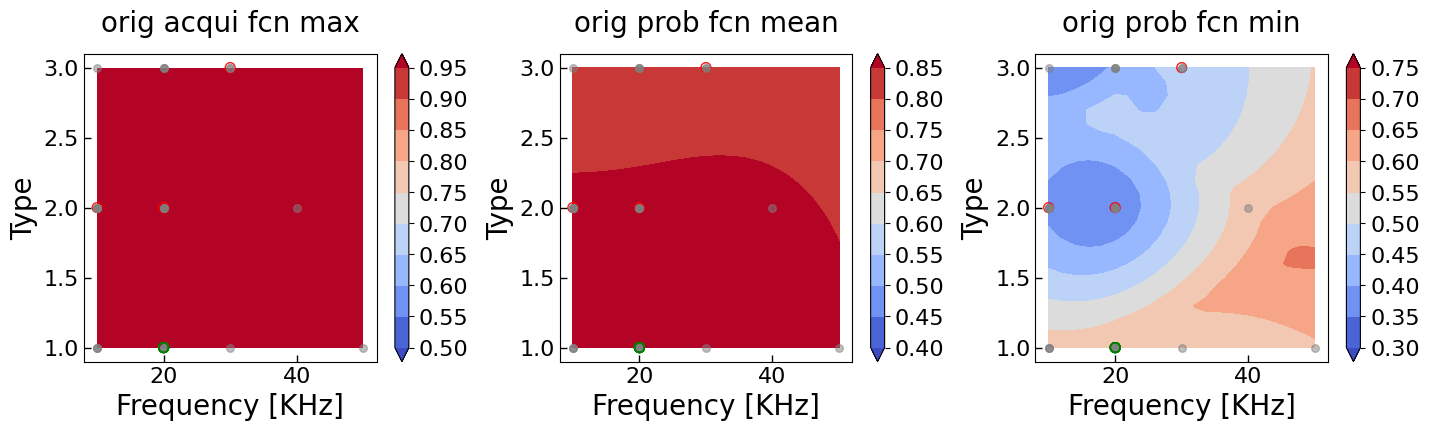

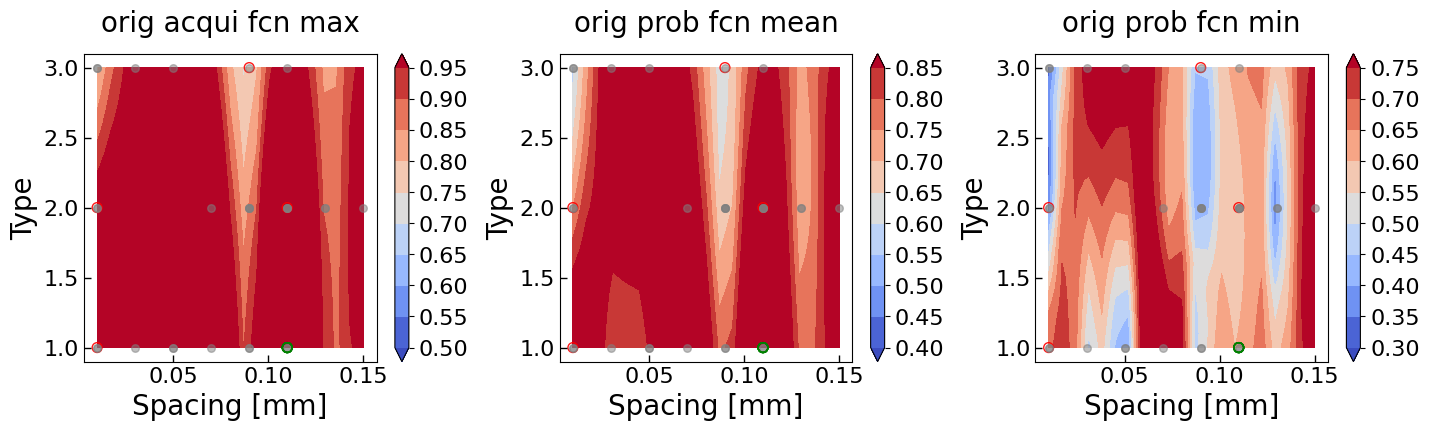

In [23]:
design = RandomDesign(parameter_space)
x_sampled = design.get_samples(200)
x_columns = df_film.iloc[:,1:7].columns
for i in range(input_dim):
    for j in range(input_dim-i-1):
        ind1 = i
        ind2 = j+i+1
        n_steps =21
        x1x2y_pred, x1x2y_var =[[],[]]
        for x1 in np.linspace(0, 1, n_steps):
            for x2 in np.linspace(0, 1, n_steps):
                x_temp = np.copy(x_sampled)
                x_temp[:,ind1] = x1
                x_temp[:,ind2] = x2
                yc_pr = f_raw_acq(x_temp)
                x1_org = x_denormalizer(x_temp)[0,ind1]
                x2_org = x_denormalizer(x_temp)[0,ind2]
                x1x2y_pred.append([x1_org, x2_org, np.max(yc_pr), np.mean(yc_pr), np.min(yc_pr)])
                
        x1c = np.array(x1x2y_pred, dtype=object)[:,0].reshape(n_steps, n_steps)
        x2c = np.array(x1x2y_pred, dtype=object)[:,1].reshape(n_steps, n_steps)
        yc_pr_max = np.array(x1x2y_pred, dtype=object)[:,2].reshape(n_steps, n_steps)
        yc_pr_mean = np.array(x1x2y_pred, dtype=object)[:,3].reshape(n_steps, n_steps)
        yc_pr_min = np.array(x1x2y_pred, dtype=object)[:,4].reshape(n_steps, n_steps)

        fs = 20
        title_pad = 16
        
        fig,axes = plt.subplots(1, 3, figsize=(17, 4), sharey = False, sharex = False)
        colorbar_offset = [0.5, 0.4, 0.3]
        for ax, y, c_offset in zip(axes, [yc_pr_max, yc_pr_mean, yc_pr_min],colorbar_offset):
            c_plt1 = ax.contourf(x1c, x2c, y/20,levels = np.arange(10)*0.05+c_offset, cmap='coolwarm', extend = 'both')# 
            cbar = fig.colorbar(c_plt1, ax= ax)
            cbar.ax.tick_params(labelsize=fs*0.8)
            ax.scatter(x_denormalizer(Xc[Yc[:,-1]==0])[:, ind1], 
                   x_denormalizer(Xc[Yc[:,-1]==0])[:, ind2], 
                   s = 50, facecolors='none', alpha = 0.9, edgecolor = 'red')
            ax.scatter(x_denormalizer(Xc)[:, ind1], 
                       x_denormalizer(Xc)[:, ind2], 
                       s = 30, facecolors='gray', alpha = 0.5, edgecolor = 'gray')
            ax.scatter(x_denormalizer(X_new)[:, ind1], 
                       x_denormalizer(X_new)[:, ind2], 
                       s = 50, facecolors='none', alpha = 0.9, edgecolor = 'green')

            ax.set_xlabel(str(x_columns[ind1]), fontsize = fs)
            ax.set_ylabel(str(x_columns[ind2]), fontsize = fs)

            x1_delta = (np.max(x1c)-np.min(x1c))*0.05
            x2_delta = (np.max(x2c)-np.min(x2c))*0.05
            ax.set_xlim(np.min(x1c)-x1_delta, np.max(x1c)+x1_delta)
            ax.set_ylim(np.min(x2c)-x2_delta, np.max(x2c)+x2_delta)
            ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)


        axes[0].set_title('orig acqui fcn max', pad = title_pad, fontsize = fs)
        axes[1].set_title('orig prob fcn mean', pad = title_pad, fontsize = fs)
        axes[2].set_title('orig prob fcn min', pad = title_pad, fontsize = fs)
        plt.subplots_adjust(wspace = 0.3)
        plt.show()

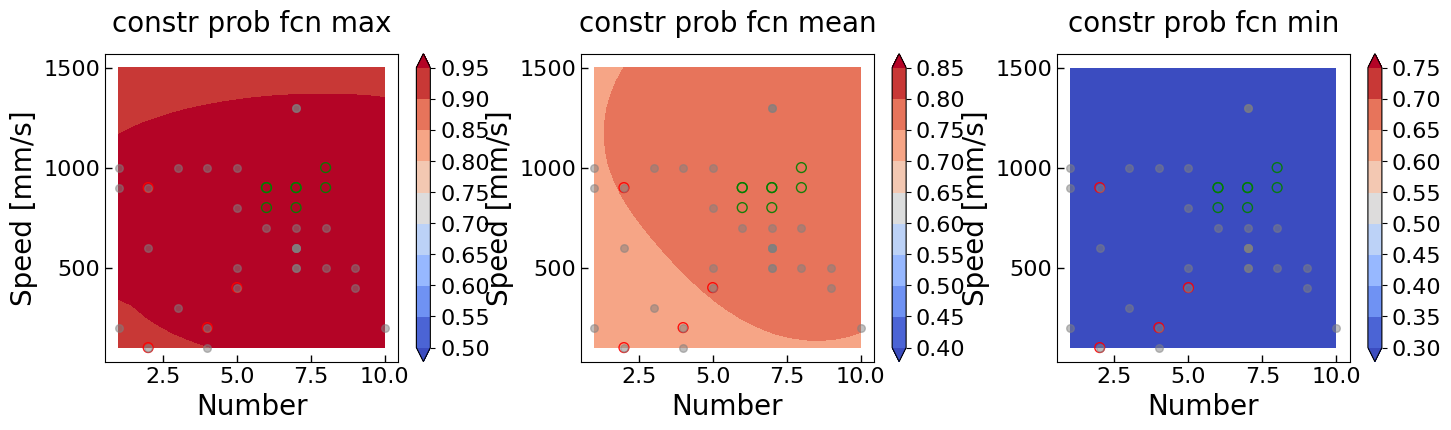

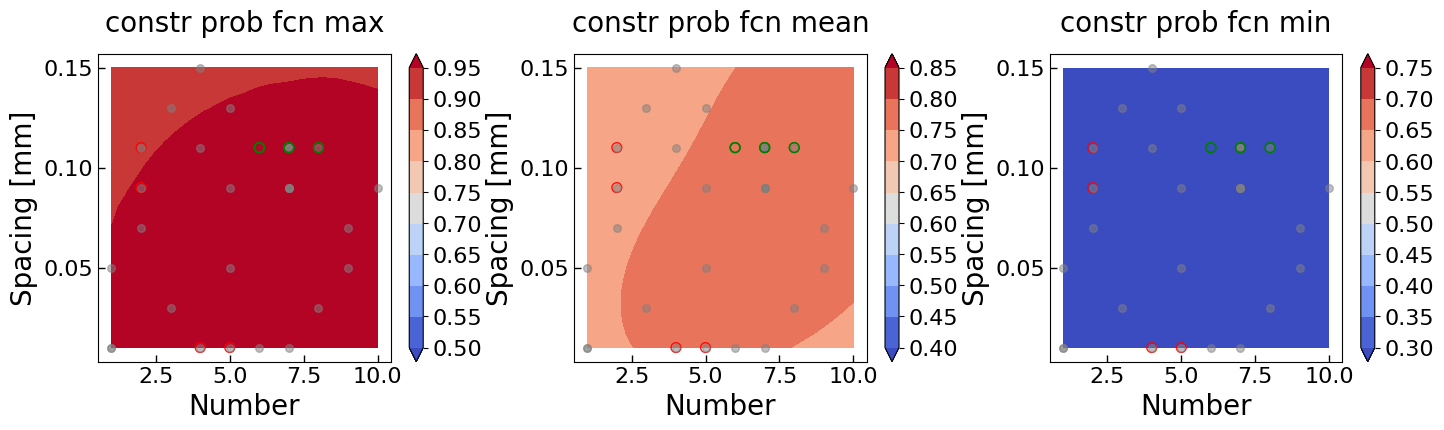

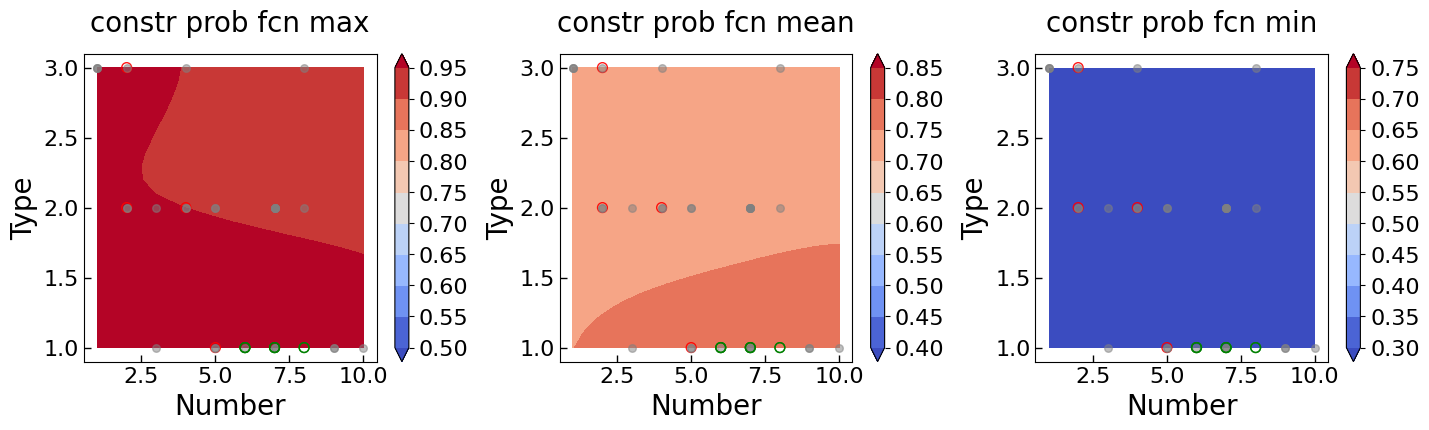

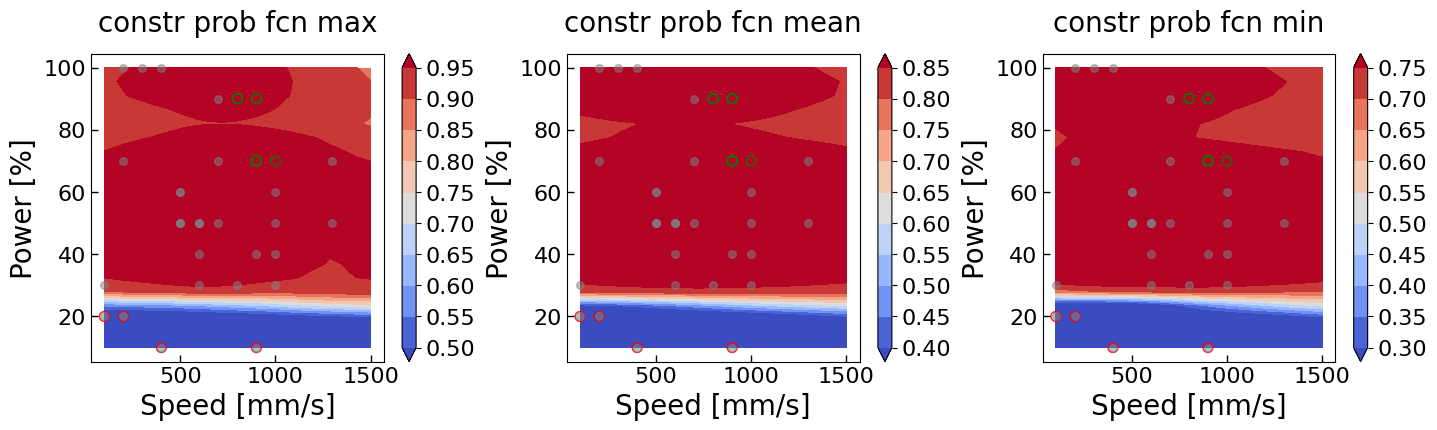

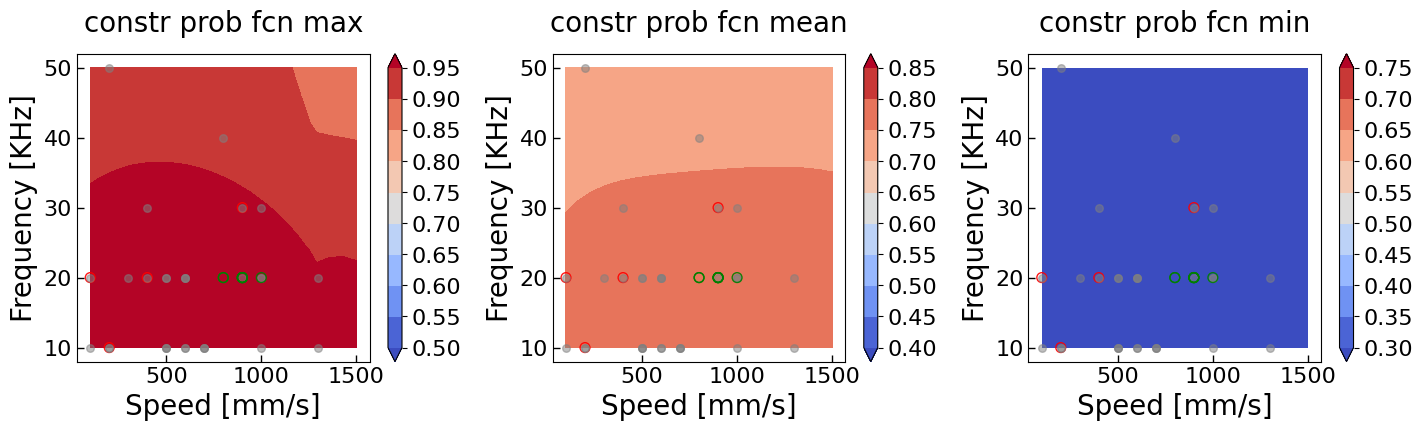

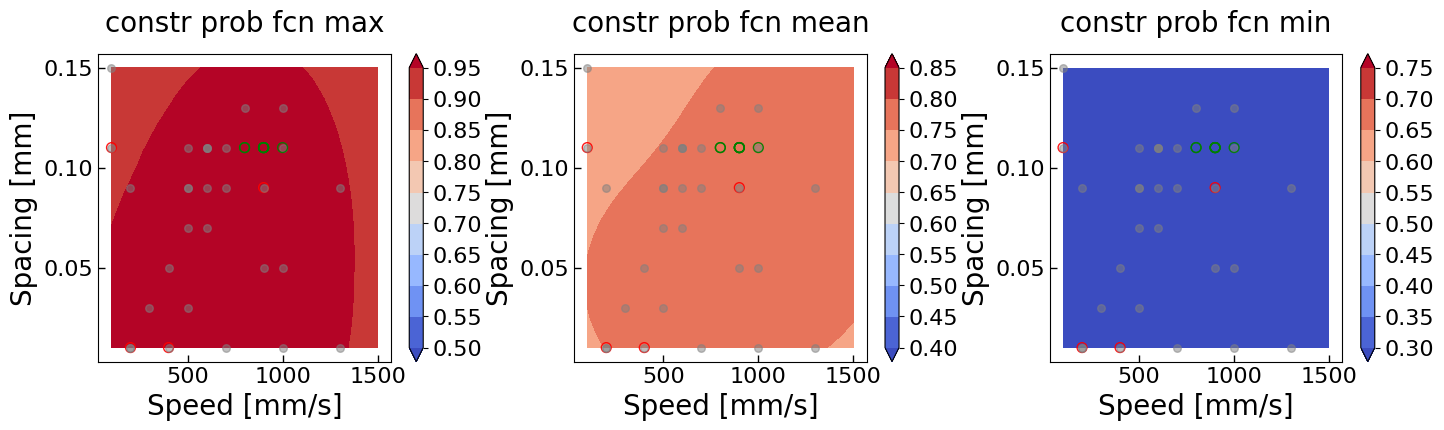

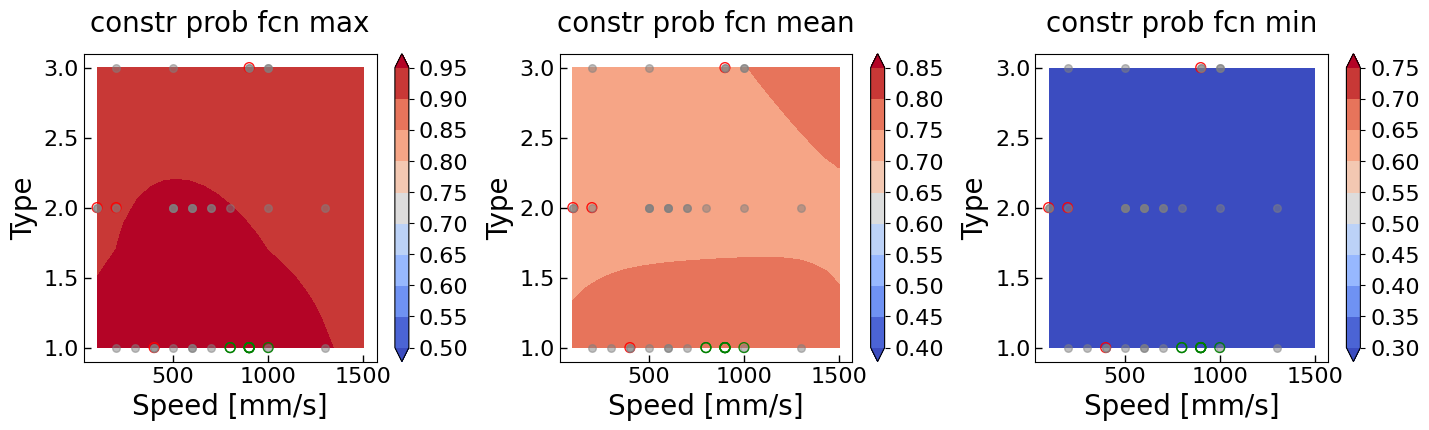

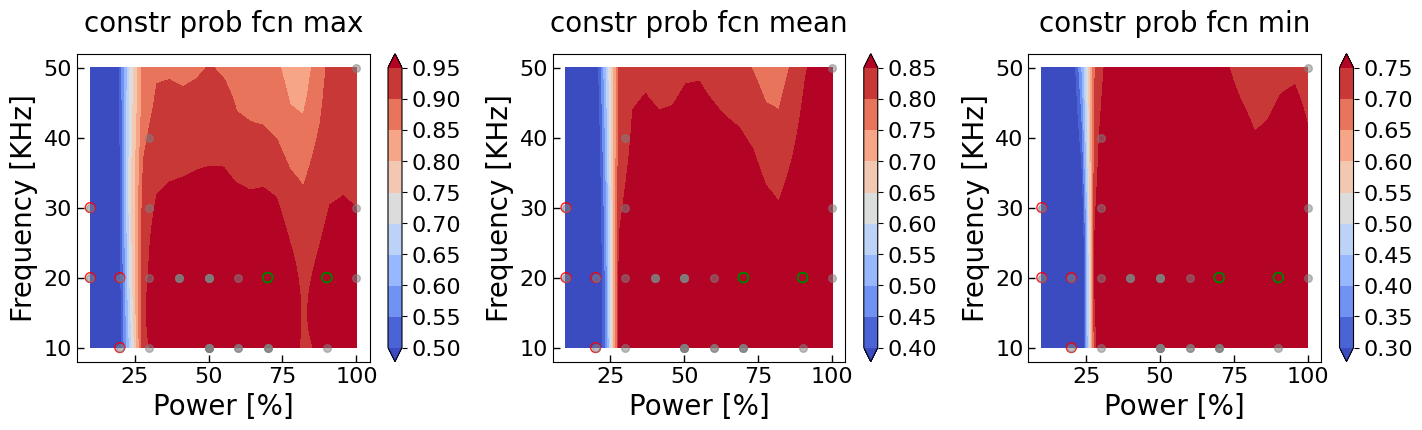

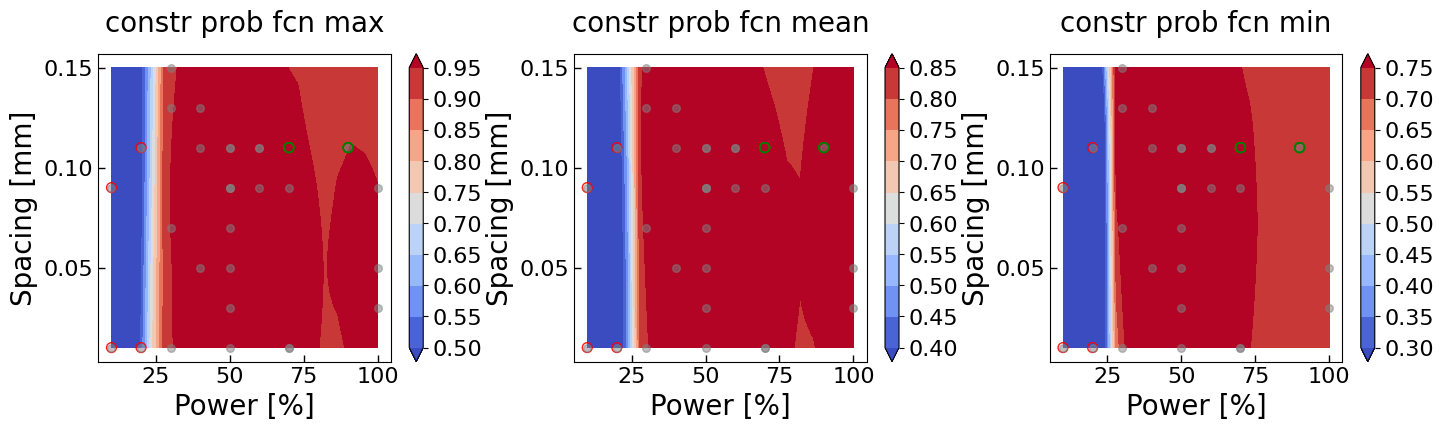

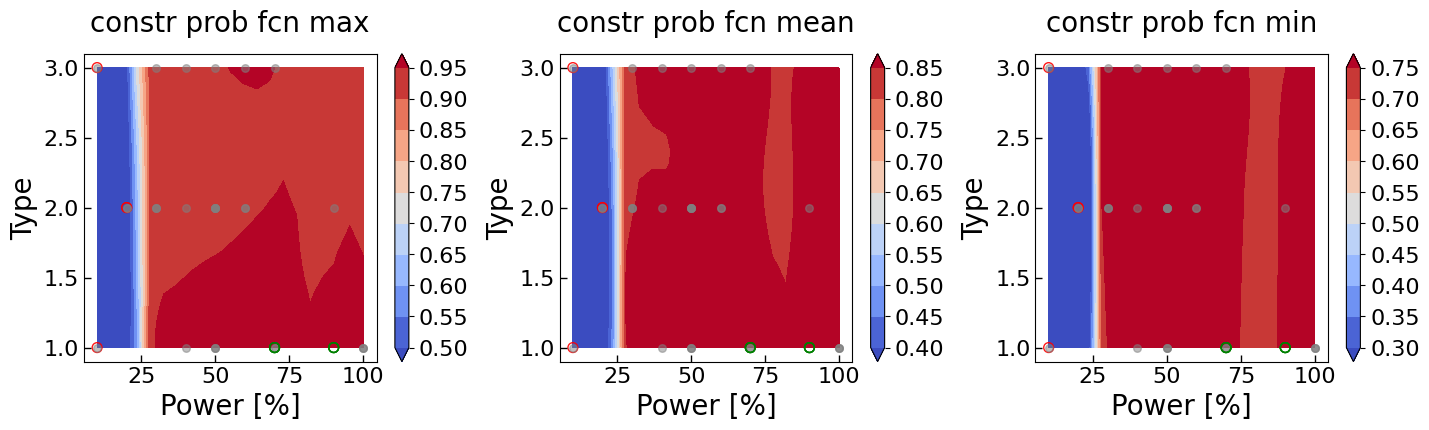

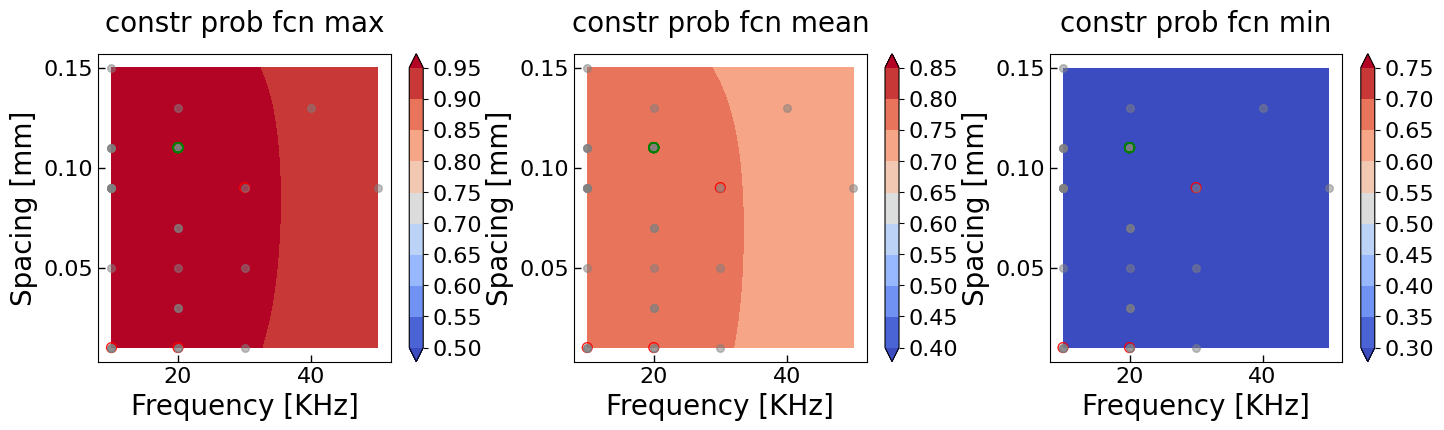

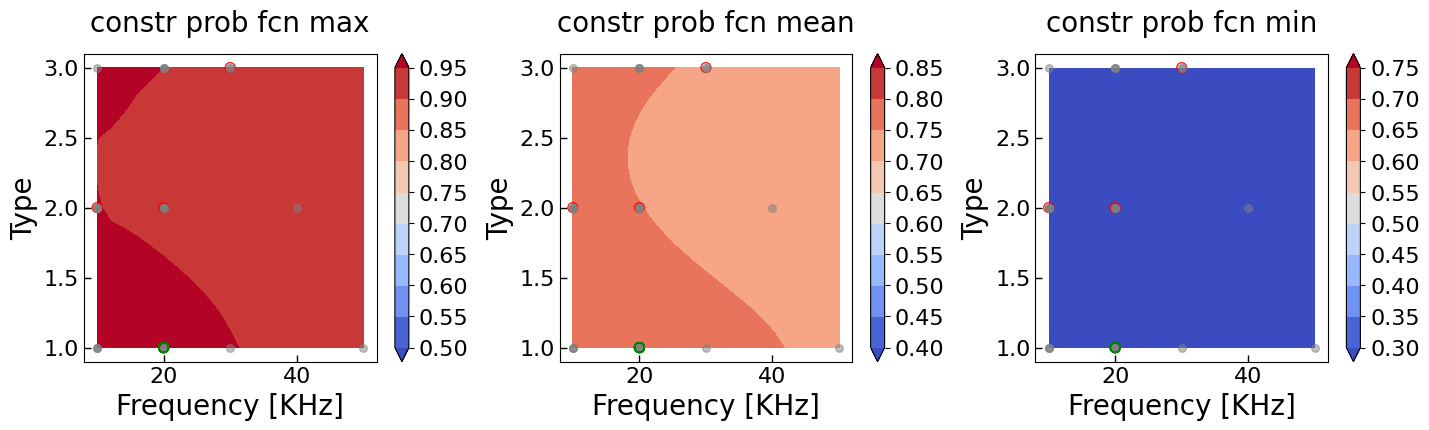

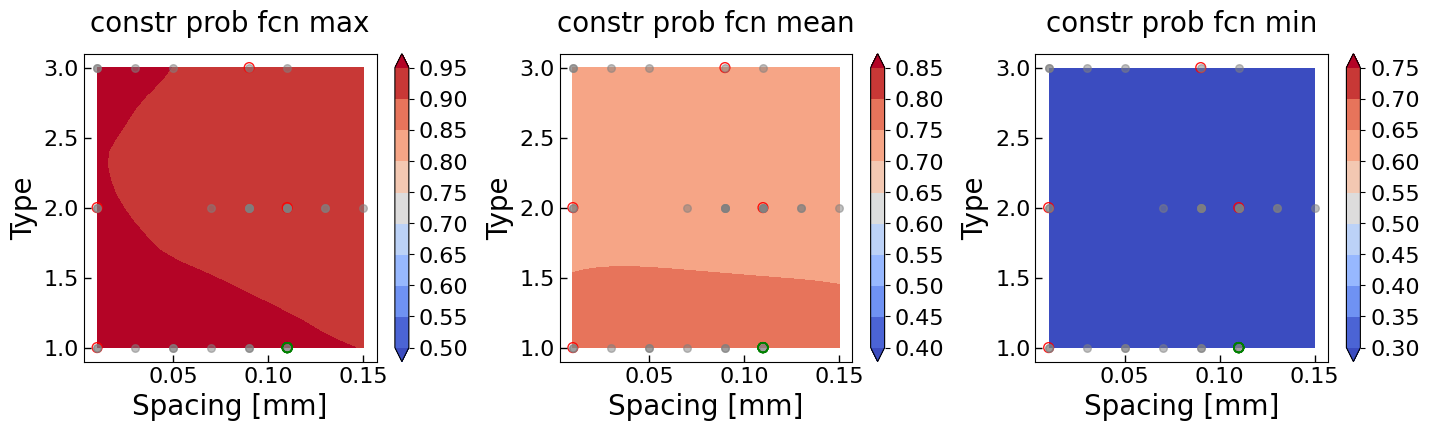

In [24]:
design = RandomDesign(parameter_space)
x_sampled = design.get_samples(200)
x_columns = df_film.iloc[:,1:7].columns
for i in range(input_dim):
    for j in range(input_dim-i-1):
        ind1 = i
        ind2 = j+i+1
        n_steps =21
        x1x2y_pred, x1x2y_var =[[],[]]
        for x1 in np.linspace(0, 1, n_steps):
            for x2 in np.linspace(0, 1, n_steps):
                x_temp = np.copy(x_sampled)
                x_temp[:,ind1] = x1
                x_temp[:,ind2] = x2
                yc_pr = f_cons_pr(x_temp)
                x1_org = x_denormalizer(x_temp)[0,ind1]
                x2_org = x_denormalizer(x_temp)[0,ind2]
                x1x2y_pred.append([x1_org, x2_org, np.max(yc_pr), np.mean(yc_pr), np.min(yc_pr)])
                
        x1c = np.array(x1x2y_pred, dtype=object)[:,0].reshape(n_steps, n_steps)
        x2c = np.array(x1x2y_pred, dtype=object)[:,1].reshape(n_steps, n_steps)
        yc_pr_max = np.array(x1x2y_pred, dtype=object)[:,2].reshape(n_steps, n_steps)
        yc_pr_mean = np.array(x1x2y_pred, dtype=object)[:,3].reshape(n_steps, n_steps)
        yc_pr_min = np.array(x1x2y_pred, dtype=object)[:,4].reshape(n_steps, n_steps)

        fs = 20
        title_pad = 16
        
        fig,axes = plt.subplots(1, 3, figsize=(17, 4), sharey = False, sharex = False)
        colorbar_offset = [0.5, 0.4, 0.3]
        for ax, y, c_offset in zip(axes, [yc_pr_max, yc_pr_mean, yc_pr_min],colorbar_offset):
            c_plt1 = ax.contourf(x1c, x2c, y,levels = np.arange(10)*0.05+c_offset, cmap='coolwarm', extend = 'both')# 
            cbar = fig.colorbar(c_plt1, ax= ax)
            cbar.ax.tick_params(labelsize=fs*0.8)
            ax.scatter(x_denormalizer(Xc[Yc[:,-1]==0])[:, ind1], 
                   x_denormalizer(Xc[Yc[:,-1]==0])[:, ind2], 
                   s = 50, facecolors='none', alpha = 0.9, edgecolor = 'red')
            ax.scatter(x_denormalizer(Xc)[:, ind1], 
                       x_denormalizer(Xc)[:, ind2], 
                       s = 30, facecolors='gray', alpha = 0.5, edgecolor = 'gray')
            ax.scatter(x_denormalizer(X_new)[:, ind1], 
                       x_denormalizer(X_new)[:, ind2], 
                       s = 50, facecolors='none', alpha = 0.9, edgecolor = 'green')

            ax.set_xlabel(str(x_columns[ind1]), fontsize = fs)
            ax.set_ylabel(str(x_columns[ind2]), fontsize = fs)

            x1_delta = (np.max(x1c)-np.min(x1c))*0.05
            x2_delta = (np.max(x2c)-np.min(x2c))*0.05
            ax.set_xlim(np.min(x1c)-x1_delta, np.max(x1c)+x1_delta)
            ax.set_ylim(np.min(x2c)-x2_delta, np.max(x2c)+x2_delta)
            ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)


        axes[0].set_title('constr prob fcn max', pad = title_pad, fontsize = fs)
        axes[1].set_title('constr prob fcn mean', pad = title_pad, fontsize = fs)
        axes[2].set_title('constr prob fcn min', pad = title_pad, fontsize = fs)
        plt.subplots_adjust(wspace = 0.3)
        plt.show()